In [1]:
import datetime
import os
import importlib

In [2]:
from ROOT import TFile,TTree,TH2F,gROOT,gStyle,TCanvas
from root_pandas import read_root 

import array
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import scipy.stats   as stat
from scipy.optimize import curve_fit
from scipy.optimize import minimize

Welcome to JupyROOT 6.18/04


/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/root_numpy/__init__.py:34: RuntimeWarning: ROOT 6.18/04 is currently active but you installed root_numpy against ROOT 6.05/02. Please consider reinstalling root_numpy for this ROOT version.
  RuntimeWarning)
/home/jcordero/anaconda3/envs/CMSenv/lib/python3.6/site-packages/root_numpy/__init__.py:46: RuntimeWarning: numpy 1.15.0 is currently installed but you installed root_numpy against numpy 1.12.1. Please consider reinstalling root_numpy for this numpy version.
  RuntimeWarning)


In [3]:
from iminuit import Minuit
from pprint import pprint

# My Dependencies

In [4]:
from Common.CommonHelper import CommonHelper

from Config import Config
from Reader import Reader

from Samples.Data import Data
from Samples.DataStack import DataStack
from Samples.DataStack import DataStackTest

import Efficiency.Efficiency as Efficiency

from Plotter.Plotter import Plotter


# Functions

In [5]:
def setConfiguration(selection,era):
    
    if   era == "2016":
        #run = ['B','C','D','E','F','G','H']    
        run = ['C','D','E','F','G','H']    
        DataGen = 'legacy'
        #path = "/home/jcordero/CMS/data/data_"+era+"/"+DataGen+"/SMP_ZG/Files/ee/"+SampleSet+"/DYJets/"
        if selection == "mumug":
            SampleSet = "MatchZGpaper/"
        elif selection == "elelg":
            SampleSet = "MatchZGpaper/"
        elif selection == "ee":
            SampleSet = "/EfficiencyCorrection/files_zee/TagProbe_noTrig/"
    elif era == "2017":
        run = ['B','C','D','E','F']
        #run = ['D']
        DataGen = 'rereco'
        #SampleSet = 'EfficiencyCorrection/files_zee/CorrShower'
        if selection == "mumug":
            #SampleSet = 'V1'
            #SampleSet = 'V2_puWeight'
            #SampleSet = 'V2_puWeight_phID'
            #SampleSet = "V4_phID_isConv"
            #SampleSet = "V4_phID_isConv_MINUIT"
            #SampleSet  = "V5_mediumID"
            #SampleSet  = "V6_lPhoton"
            SampleSet  = "V6_Accept/"  
        elif selection == "elelg":
            #SampleSet = 'V1'
            #SampleSet = 'V2_puWeight'
            #SampleSet = 'V2_puWeight_phID'
            #SampleSet = "V4_phID_isConv"
            #SampleSet = "V4_phID_isConv_MINUIT"
            #SampleSet  = "V5_mediumID"
            #SampleSet  = "V6_lPhoton"
            SampleSet  = "V6_Accept/"   
        elif selection == "mumu":
            #SampleSet = 'V1'
            #SampleSet = 'V2_puWeight'
            SampleSet = 'V2_puWeight_phID/'
        elif selection == "ee":
            SampleSet = 'EfficiencyCorrection/files_zee/V4_phID_isConv/'
    elif era == "2018":
        run = ['A','B','C','D']
        DataGen = 'rereco'
        if selection == "mumug":
            #SampleSet = 'V1_trigBits'
            SampleSet = 'V2_trigBits_pu/'
        elif selection == "elelg":
            SampleSet = 'V2_trigBits_pu/'
        elif selection == "mumu":
            SampleSet = 'V2_trigBits_pu/'
        elif selection == "ee":
            SampleSet = 'EfficiencyCorrection/files_zee/V2_trigBits_pu/'

    path = "/home/jcordero/CMS/data/data_"+era+"/"+DataGen+"/SMP_ZG/Files/"+selection+"/"+SampleSet
    
    pathMVA = "/home/jcordero/CMS/data/data_"+era+"/"+DataGen+"/SMP_ZG/Files/ShowerShapeMVA/"
    #path    = "/home/jcordero/CMS/data/data_"+era+"/"+DataGen+"/SMP_ZG/Files/"+selection+"/"+SampleSet+"/"
    figpath = "/home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/"+era+"/"+DataGen+"/"+selection+"/"
    pathSelection = "/home/jcordero/CMS/data/data_"+era+"/"+DataGen+"/SMP_ZG/Files/"+selection+"/"+SampleSet+"Reduced"

    '''
    LoadVars = [
                'runNumber','evtNumber',
                'nPV','nPU','Rho', 'met',
                'genWeight','eventWeight','puWeight','triggerWeight','photonIDWeight',"photonIsConvWeight",
                'genPhotonFHPFS','genPhotonIPFS',
                'leptonOnePt','leptonOneEta','leptonOnePhi','leptonOneIso','leptonOneCharge',
                'leptonTwoPt','leptonTwoEta','leptonTwoPhi','leptonTwoIso','leptonTwoCharge',
                'photonOnePt','photonOneEta','photonOnePhi',
                'photonOneR9','photonOneMVA','photonOneERes','photonOneSieie',
                'photonOneHoverE','photonOneIneu','photonOneIph','photonOneIch',
                'photonOneSieip','photonOneSipip','photonOneSrr','photonOneE2x2','photonOneE5x5',
                'photonOneScEtaWidth','photonOneScPhiWidth',
                'photonOneScRawE','photonOnePreShowerE','photonOneScBrem',
                'genPhotonPt',
                'vetoDY','genIsoPass',
                'dileptonPt','dileptonEta','dileptonPhi','dileptonM',
                'llgPt','llgEta','llgPhi','llgM',
                'dileptonDEta','dileptonDPhi','dileptonDR',
                'l1PhotonDEta','l1PhotonDPhi','l1PhotonDR','l1PhotonM','l1PhotonPt',
                'l2PhotonDEta','l2PhotonDPhi','l2PhotonDR','l2PhotonM','l2PhotonPt',
                'dileptonPhotonDEta','dileptonPhotonDPhi','dileptonPhotonDR',
                'nMuons','nElectrons','nPhotons','nJets','nBJets',
                'passElectronVeto',
                ]       
    ''';
    
    ## REDUCED
    LoadVars = [
                #'runNumber','evtNumber',
                'nPV',
                'nPU',

                #'genWeight',
                'eventWeight','puWeight',
                #'triggerWeight','photonIDWeight',
                'photonOneEta',
                #'leptonOneCharge','leptonTwoCharge',
                #'photonOneMVA',
                #'photonOneERes',

                ############################# 

                #'photonOneR9',
                'photonOneSieie',
                #'photonOneHoverE',

                #'photonOneIneu','photonOneIph','photonOneIch',
                #'photonOneSieip',
                #'photonOneSipip',
                #'photonOneSrr',
                #'photonOneE2x2',
                #'photonOneE5x5',
                #'photonOneScEtaWidth',
                #'photonOneScPhiWidth',
                #'photonOneScRawE',
                #'photonOnePhi',
                #'photonOnePreShowerE',
                #'photonOneScBrem',
                #'Rho',
                ##############################
                #'genPhotonPt',
                #'vetoDY',
                #'genIsoPass',
                #'passElectronVeto',
                'ProbeIDPass','ProbeWorstPass',
                ]    

    
    config = Config(
                    path       = path,
                    era        = era,
                    DataGen    = DataGen,
                    run        = run,
                    selection  = selection,
                    LoadVars   = LoadVars,
                    )
    
    return config, pathMVA, path, figpath, pathSelection

# FIT

In [6]:
def GoodGuess(i,j,Ni,Nj,tries,p0):
    if   len(p0) == 4:
        ####################################
        if i == 2 or i == 7:
            return False
        else:
            p0 = [np.random.rand()*1e6,   np.random.rand()*1e4, np.random.rand()*1e5,   np.random.rand()*1e4]

        ####################################
        if j == Nj-1 or j == Nj-2:
            #p0 = [1e5,   1e3, 1e5,   1e3]
            #p0 = [1e6,   1e6, 1e6,   1e6]
            p0 = [1e2,   2e2, 1e2,   2e2]
        else:
            p0 = [np.random.rand()*1e4,   np.random.rand()*1e3, np.random.rand()*1e3,   np.random.rand()*1e3]
        ####################################
        if tries == 100:
            print('Reach Maximum tries')
            return False
    elif len(p0) == 12:
        ####################################
        if i == 2 or i == 7:
            return False
        else:
            p0 = [
                np.random.rand()*1e6,   np.random.rand()*1e4, np.random.rand()*1e5,   np.random.rand()*1e4,
                np.random.rand()*60, np.random.rand()*10, np.random.rand()*200,   np.random.rand()*10,
                np.random.rand()*60, np.random.rand()*10, np.random.rand()*200,  np.random.rand()*10
                ]

        ####################################
        if j == Nj-1 or j == Nj-2:
            p0 = [
                    #1e5,   1e5, 1e5,   1e5,
                    1e2,   2e2, 1e2,   2e2,
                    1, -0.1, 1, 0.1,
                    1, -0.1, 1, 0.1
                    ]
        else:
            p0 = [
                np.random.rand()*1e4,   np.random.rand()*1e3, np.random.rand()*1e3,   np.random.rand()*1e3,
                np.random.rand()*60, -np.random.rand()*10, np.random.rand()*200,   np.random.rand()*10,
                np.random.rand()*60, -np.random.rand()*10, np.random.rand()*200,   np.random.rand()*10
                ]
        ####################################
        if tries == 1000:
            print('Reach Maximum tries')
            return False
    elif len(p0) == 14:
        ####################################
        if i == 2 or i == 7:
            return False
        else:
            p0 = [
                np.random.rand()*1e6,   np.random.rand()*1e4, np.random.rand()*1e5,   np.random.rand()*1e4,
                np.random.rand()*3, np.random.rand()*3, np.random.rand()*120,
                np.random.rand()*0.05, np.random.rand()*3,
                np.random.rand()*3, np.random.rand()*3, np.random.rand()*120,
                np.random.rand()*0.05, np.random.rand()*3,
                ]

        ####################################
        if j == Nj-1 or j == Nj-2:
            p0 = [
                5e3,   13e3, 5,   13,
                2, 2, 87,
                0.03, 0,
                2, 2, 87,
                0.03, 0,
                ]
        else:
            p0 = [
                np.random.rand()*1e6,   np.random.rand()*1e4, np.random.rand()*1e5,   np.random.rand()*1e4,
                np.random.rand()*3, np.random.rand()*3, np.random.rand()*120,
                np.random.rand()*0.05, np.random.rand()*3,
                np.random.rand()*3, np.random.rand()*3, np.random.rand()*120,
                np.random.rand()*0.05, np.random.rand()*3,
                ]
    elif len(p0) == 18:
        if i == 2 or i == 7:
            return False
        else:
            p0 = [
                np.random.rand()*1e6,   np.random.rand()*1e4, np.random.rand()*1e5,   np.random.rand()*1e4,
                # Pass
                np.random.rand()*2,   np.random.rand()*2, np.random.rand()*30,
                np.random.rand()*1e5, np.random.rand()*1e5, np.random.rand()*200,   np.random.rand()*10,
                #Fail
                np.random.rand()*2,   np.random.rand()*2, np.random.rand()*60,
                np.random.rand()*1e5, np.random.rand()*1e5, np.random.rand()*200,  np.random.rand()*10
                ]
        ###########################
        if j == Nj-1 or j == Nj-2:
            p0 = [
                    2e4,   5e3, 1e4,   1e3,
                    #Pass
                    1, 1, 20,
                    1, -2, 100,   -0.03,
                    # Fail
                    1, 1, 50,
                    1e2, 1e2, 100,   -0.03,
                    ]
        else:
            p0 = [
                np.random.rand()*1e6,   np.random.rand()*1e4, np.random.rand()*1e5,   np.random.rand()*1e4,
                # Pass
                np.random.rand()*2,   np.random.rand()*2, np.random.rand()*30,
                np.random.rand()*1e5, np.random.rand()*1e5, np.random.rand()*200,   np.random.rand()*10,
                #Fail
                np.random.rand()*2,   np.random.rand()*2, np.random.rand()*60,
                np.random.rand()*1e5, np.random.rand()*1e5, np.random.rand()*200,  np.random.rand()*10
                ]          

    return p0

# Main Functionality

In [7]:
def Plot(ax,
         Var,
         ranges, bins, color,
         DataMC='mc',
         tempType='KDE'
        ):
    
        
        if type(bins) is np.ndarray or type(bins) is list:
            hist = np.histogram(
                                Var,
                                range    = ranges,
                                bins     = bins,
                                )
            hist = ax.hist(
                            bins[:-1],
                            histtype = 'step',
                            range    = ranges,
                            weights  = hist[0]/np.diff(bins),
                            bins     = bins,
                            color    = color,
                            label    = 'HIST', 
                            )
        else:
            hist = ax.hist(
                            Var,
                            histtype = 'step',
                            range    = ranges,
                            bins     = bins,
                            color    = color,
                            label    = 'HIST', 
                            #density  = True,
                            )
        
        xc = (hist[1][:-1]+hist[1][1:])/2
        hist[0][np.isnan(hist[0])] = 0
        
        #######
        if   tempType == 'KDE':
            try:
                kde       = stat.gaussian_kde(dataset = Var)    
                template  = kde(xc)
                ratio     = np.sum(template)/np.sum(hist[0])
            except:
                template = xc*0
                ratio    = 1
        elif tempType == 'HIST':
                template = hist[0]
                ratio    = 1
            
        
        ax.plot(xc,template/ratio,'k--',label = 'KDE')
        ax.grid(linestyle = '--')
        ax.legend()
        
        return template, ratio

In [8]:
def EffGrid(sample,
            part         = 'dilepton',
            variable     = 'M',
            DataMC       = 'mc',
            samples      = '',
            ProbeType    = 'Pass',
            IDPass       = True,
            ptBins       = array.array("f",[0,20,35,50,90,150,500]), 
            etaBins      = array.array("f",[-2.5,-2,-1.566,-1.4442,-1.0,0,1.0,1.4442,1.566,2,2.5]),
            Abs          = False, 
            isConv       = False,
            ranges       = [60,120],
            bins         =  60, # Should be ranges[1]-ranges[0]
            tempType     = 'KDE',
            BinEBEE      = None,
           ):
    #### Array Outputs
    template,ratios = {},{}
    
    ### Eta Bin formating
    etaBinsEBEE    = [[0,1.4442],[1.566,2.5]]
    etaBins,ptBins = Help.Plot.BinFormat(etaBins), Help.Plot.BinFormat(ptBins)
    etaNBin,ptNBin = len(etaBins),len(ptBins)

    ### Ploting variable
    if ProbeType == "Pass":
        color = 'C0'
    else:
        color = 'C1' 
    
    figx, figy = etaNBin, ptNBin

    fig = plt.figure(figsize=(figy*3,figx*4))
    for j in np.arange(ptNBin):
        if j in BinEBEE:
            etaBINS = etaBinsEBEE
        else:
            etaBINS = etaBins

        template[j],ratios[j] = {},{}
        for i in np.arange(len(etaBINS)):                 
            VAL = sample[part+variable]
            if IDPass:
                if ProbeType == "Pass":
                    Ind = sample["ProbeIDPass"] == True
                    Ind = np.logical_and(Ind,sample["ProbeISOPass"]   == True)
                    Ind = np.logical_and(Ind,sample["ProbeWorstPass"] == True)
                    Ind = np.logical_and(Ind,sample["ProbeSigPass"]   == True)
                    if isConv:
                        Ind = np.logical_and(Ind,sample["ProbeIsConv"]    == True)
                    
                else:
                    if isConv:
                        Ind = sample["ProbeIDPass"] == True
                        Ind = np.logical_and(Ind,sample["ProbeISOPass"]   == True)
                        Ind = np.logical_and(Ind,sample["ProbeWorstPass"] == True)
                        Ind = np.logical_and(Ind,sample["ProbeSigPass"]   == True)

                        Ind = np.logical_and(Ind,sample["ProbeIsConv"]    == False)
                    else:
                        Ind = sample["ProbeIDPass"] == False
                        Ind = np.logical_or(Ind,sample["ProbeISOPass"]   == False)
                        Ind = np.logical_or(Ind,sample["ProbeWorstPass"] == False)
                        Ind = np.logical_or(Ind,sample["ProbeSigPass"]   == False)


            else:
                if ProbeType == "Pass":
                    Ind = sample["ProbeIDPass"] == True
                else:
                    Ind = sample["ProbeIDPass"] == False    
            
            
            Var = np.array(VAL[Ind])
            Pt  = sample['leptonTwoPt'][Ind]
            Eta = sample['leptonTwoEta'][Ind]

            ptInd  = Help.Plot.BinIndex(Pt , ptBins [j][0], ptBins [j][1], Abs = Abs)
            etaInd = Help.Plot.BinIndex(Eta, etaBINS[i][0], etaBINS[i][1], Abs = Abs)
            Ind    = np.logical_and(ptInd,etaInd)


            ij = ptNBin*i + (j+1)     
            plt.subplot(etaNBin, ptNBin, ij)
            ax = plt.gca()

            TEMP, RATIO = Plot(
                                ax       = ax,
                                Var      = Var[Ind],
                                ranges   = ranges,
                                bins     = bins,
                                color    = color,
                                DataMC   = DataMC,
                                tempType = tempType,
                                )
                    
            template[j][i] = TEMP
            ratios[j][i]   = RATIO
            
        

            if j == 0:
                ax.set_ylabel('Eta ['+str(round(etaBINS[i][0],2))+','+str(round(etaBINS[i][1],2))+']'  )        
            if i == 0:
                ax.set_title('Pt ['+str(ptBins[j][0])+','+str(ptBins[j][1])+']' )
                
    

    
    plt.tight_layout()
    plt.show()
    #fig.savefig('/home/jcordero/CMS/MEH/zee/'+'zee_'+DataMC+'/'+samples+'_'+ProbeType+'_PeakMap.png')
    if isConv:
        fig.savefig(figpath+DataMC+samples+'_'+ProbeType+'_PeakMap_isConv.png')
    else:
        fig.savefig(figpath+DataMC+samples+'_'+ProbeType+'_PeakMap.png')
    
    return template,ratios

# Extract Data

In [9]:
#era = "2016"
#era = "2017"
era = "2018"

selection = "ee"
#selection = "mumug"
#selection = "elelg"

config, pathMVA, path, figpath, pathSelections = setConfiguration(selection,era)

config.LoadVars = [
                    "genWeight","eventWeight",
                    "dileptonM",
                   "leptonOnePt","leptonOneEta",
                   "leptonTwoPt","leptonTwoEta",
                   "vetoDY","genIsoPass",
                   "ProbeIDPass","ProbeISOPass","ProbeWorstPass","ProbeSigPass","ProbeIsConv"
                   #"ProbePass",
                   #"TagFromZ","ProbeFromZ",
                  ]
#config.run = ["B"]

Help   = Efficiency.EffHelp
Read   = Reader(Config = config, Print = False)
Plot   = Plotter(Config = config)
EffAna = Efficiency.Efficiency(Config = config)

Just set plot param legend.loc empty


Just set plot param axes.grid True
Just set plot param axes.titlesize 24
Just set plot param axes.labelsize 20
Just set plot param xtick.labelsize 16.0
Just set plot param ytick.labelsize 16.0
Just set plot param legend.loc best
Just set plot param legend.fontsize 13


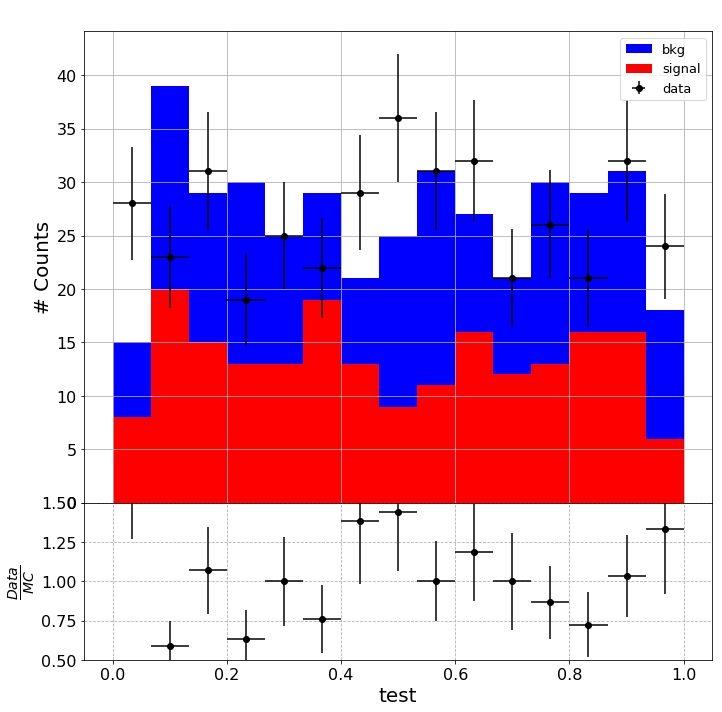

Error in <TFile::TFile>: file output__0.root does not exist
Error in <TFile::TFile>: file output__0.root does not exist
Error in <TFile::TFile>: file output__0.root does not exist


In [10]:
Plot.Test()

In [11]:
data = Read.read()
dataS = DataStack(data)

<p>Error: <class 'AttributeError'></p>
<p>Error: <class 'AttributeError'></p>
<p>Error: <class 'AttributeError'></p>
<p>Error: <class 'AttributeError'></p>
<p>Error: <class 'AttributeError'></p>
Electron_2018 is empty and excluded from stack


Error in <TFile::TFile>: file /home/jcordero/CMS/data/data_2018/rereco/SMP_ZG/Files/ee/EfficiencyCorrection/files_zee/V2_trigBits_pu/WWTo2L2Nu/output_WWTo2L2Nu_v_0.root does not exist
Error in <TFile::TFile>: file /home/jcordero/CMS/data/data_2018/rereco/SMP_ZG/Files/ee/EfficiencyCorrection/files_zee/V2_trigBits_pu/ZZTo2L2Nu/output_ZZTo2L2Nu_v_0.root does not exist
Error in <TFile::TFile>: file /home/jcordero/CMS/data/data_2018/rereco/SMP_ZG/Files/ee/EfficiencyCorrection/files_zee/V2_trigBits_pu/ZZTo2L2Q/output_ZZTo2L2Q_v_0.root does not exist
Error in <TFile::TFile>: file /home/jcordero/CMS/data/data_2018/rereco/SMP_ZG/Files/ee/EfficiencyCorrection/files_zee/V2_trigBits_pu/WZTo2L2Q/output_WZTo2L2Q_v_0.root does not exist
Error in <TFile::TFile>: file output__0.root does not exist
Error in <TFile::TFile>: file output__0.root does not exist
Error in <TFile::TFile>: file output__0.root does not exist
Error in <TFile::TFile>: file output__0.root does not exist
Error in <TFile::TFile>: fil

In [ ]:
#################
#binsSelected = "Plots"
binsSelected = "Optimized"
#binsSelected = "Hien"

EffAna.loadBins(Type = binsSelected)
print(EffAna)

# Extract MC

In [12]:
#################
S = "DYJets"
#S = "WJets"
sample = dataS[S]    

NameError: name 'dataS' is not defined

In [13]:

tempType = 'HIST'
#tempType = 'KDE'

#Abs = True
Abs = False

#isConv = True
isConv = False

ptBins = EffAna.bins["pt"]
etaBins = EffAna.bins["eta"]

ptBins = Help.Plot.BinFormat(ptBins)
etaBins = Help.Plot.BinFormat(etaBins)

etaBinsEBEE    = [[0,1.4442],[1.566,2.5]]
#################
BinEBEE = [len(ptBins)-1]
#################

normalBin = True
#normalBin = False

ranges = [60,120]
if normalBin:
    bins   = int((ranges[1] - ranges[0] )/2)
    step = (ranges[-1]-ranges[0])/float(bins)
    bins = [ranges[0]+step*i for i in range(bins)]
else:
    bins = [60,65,70,75,80,82,84,86,87,88,89,90,91,92,93,94,96,98,100,105,110,115,120]
weight = np.diff(bins)
binMult = 2
xc = (np.array(bins[:-1])+np.array(bins[1:]))/binMult
x = xc




    

In [15]:
len(xc)

29

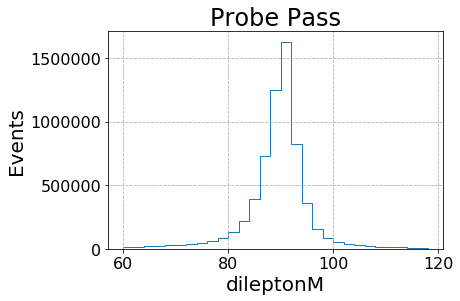

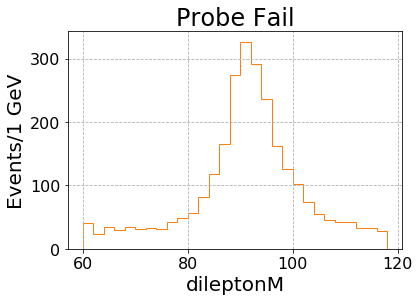

In [16]:
part = "dilepton"
var  = "M"


ProbeType = "Pass"
#ProbeType = "Fail"
VAR = part+var

filters = ["ProbeIDPass","ProbeISOPass","ProbeWorstPass","ProbeSigPass"]
if ProbeType == "Pass":
    Ind = EffAna.getIndex(dataS[S], filters = filters, flag = True)
else:
    Ind = EffAna.getIndex(dataS[S], filters = filters, flag = False)

###############################
Pass = np.histogram(
                np.array(dataS[S][VAR][Ind]),
                range    = ranges,
                bins     = bins,
                )

plt.figure()
plt.hist(
        bins[:-1],
        weights = Pass[0]/weight,
        range    = ranges,
        bins  = bins,
        histtype = 'step',
        color    = 'C0',
        )
plt.grid(linestyle = '--')
plt.ylabel(r'Events')
plt.xlabel(part+var)
plt.title('Probe '+ProbeType  )
plt.show()
###############################

#ProbeType = "Pass"
ProbeType = "Fail"
VAR = part+var
if ProbeType == "Pass":
    Ind = EffAna.getIndex(dataS[S], filters = filters, flag = True)
    if isConv:
        Ind = np.logical_and(Ind,sample["ProbeIsConv"] == True)
else:
    Ind = EffAna.getIndex(dataS[S], filters = filters, flag = False)
    if isConv:
        Ind = np.logical_or(Ind,sample["ProbeIsConv"] == False)
    
Fail = np.histogram(
                np.array(dataS[S][VAR][Ind]),
                range    = ranges,
                bins     = bins,
                )
plt.figure()
plt.hist(
        bins[:-1],
        weights  = Fail[0]/weight,
        range    = ranges,
        bins     = bins,
        histtype = 'step',
        color    = 'C1',
        )

plt.grid(linestyle = '--')
plt.ylabel(r'Events/1 GeV')
plt.xlabel(part+var)
plt.title('Probe '+ProbeType  )
plt.show()

###############################

/home/jcordero/CMS/SMP_ZGamma/python/Plotter/Plotter.py:913: RuntimeWarning: invalid value encountered in true_divide
  rDataMC = Data[1]/Bkg
/home/jcordero/CMS/SMP_ZGamma/python/Plotter/Plotter.py:927: RuntimeWarning: invalid value encountered in true_divide
  errDataMC = Data[1]/h*np.sqrt(1/Data[1]+1/h)
/home/jcordero/CMS/SMP_ZGamma/python/Plotter/Plotter.py:927: RuntimeWarning: divide by zero encountered in true_divide
  errDataMC = Data[1]/h*np.sqrt(1/Data[1]+1/h)


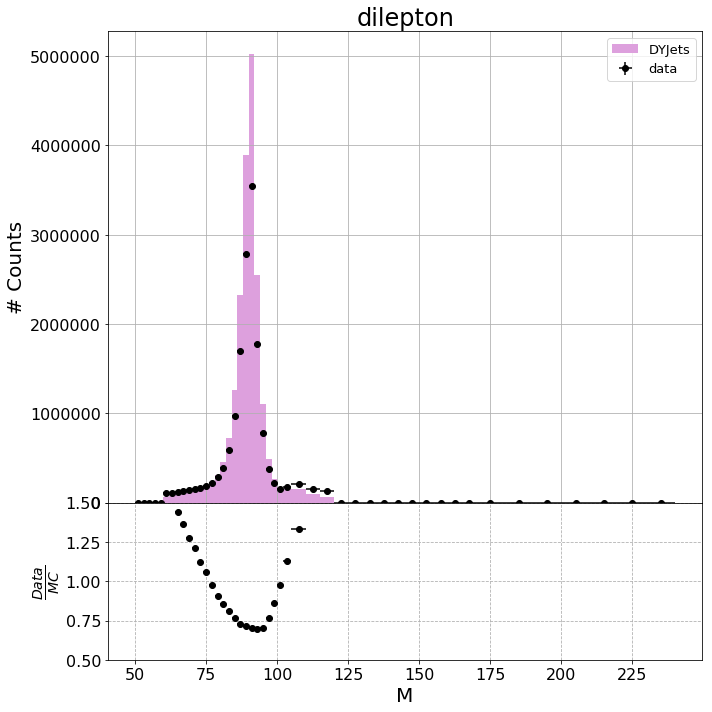

In [17]:
Plot.Plot(dataS,
          var = "M", part = "dilepton",
          signalInclude = True, density = False
         );

# MC EFF

In [18]:
probe = "leptonTwo"
tag = "leptonOne"

part = "dilepton"
var = "M"

S  = "DYJets"

filters = ["ProbeIDPass","ProbeISOPass","ProbeWorstPass","ProbeSigPass"]
for d in dataS:
    d.ResetCuts()
for d in dataS:
    print('---',d.name)
    Ind = EffAna.getIndex(d, filters = filters, flag = True)
    d.AddCuts(Ind)
    
PassMC = EffAna.GetYields(
                        dist1 = dataS[S].GetWithCuts(probe+"Pt"),
                        dist2 = dataS[S].GetWithCuts(probe+"Eta"),
                        bins1 = {"pt": EffAna.bins["pt"] },
                        bins2 = {"eta": EffAna.bins["eta"] },
                        Abs1 = False, Abs2 = False,
                        )


for d in dataS:
    d.ResetCuts()
    
for d in dataS:
    print('---',d.name)
    Ind = EffAna.getIndex(d, filters = filters, flag = False)
    d.AddCuts(Ind)
    
FailMC = EffAna.GetYields(
                        dist1 = dataS[S].GetWithCuts(probe+"Pt"),
                        dist2 = dataS[S].GetWithCuts(probe+"Eta"),
                        bins1 = {"pt": EffAna.bins["pt"] },
                        bins2 = {"eta": EffAna.bins["eta"] },
                        Abs1 = False, Abs2 = False,
                        )

--- DYJets
--- Electron_2017
--- DYJets
--- Electron_2017


In [19]:
print(
    np.sum(dataS['DYJets'].df["ProbeIsConv"] == True),
    np.sum(dataS['DYJets'].df["ProbeIsConv"] == False),
    np.sum(dataS['DYJets'].df["ProbeIsConv"] == True)/float(np.sum(dataS['DYJets'].df["ProbeIsConv"] == False)+np.sum(dataS['DYJets'].df["ProbeIsConv"] == True)),
    
    )

13806537 871869 0.9406019291195515


In [20]:
effMC, effMCStat = EffAna.eff(PassMC,FailMC)

In [21]:
isConv = True
if isConv:
    fileOut = TFile(figpath+binsSelected+"/isConv/"+"eff_photon_mc.root","recreate")
else:
    fileOut = TFile(figpath+binsSelected+"/ID/"+"eff_photon_mc.root","recreate")
tree = TTree("eff_photon","eff_photon")

gStyle.SetOptStat(0)
#################################################

ptBins  = array.array("f",Help.Plot.BinFormat(ptBins,Type='edges'))
etaBins = array.array("f",Help.Plot.BinFormat(etaBins,Type='edges'))


ptNBins,etaNBins = len(ptBins)-2, len(etaBins)-1
histDraw = TH2F("EGamma_eff","Eff",
              ptNBins ,ptBins,
              etaNBins,etaBins)


ptNBins,etaNBins = len(ptBins)-1, len(etaBins)-1
hist2d = TH2F("EGamma_eff","Eff",
              ptNBins ,ptBins,
              etaNBins,etaBins)

ptNBins,etaNBins = len(ptBins)-2, len(etaBins)-1
statDraw = TH2F("EGamma_eff_draw_stat","Eff",
              ptNBins ,ptBins,
              etaNBins,etaBins)


ptNBins,etaNBins = len(ptBins)-1, len(etaBins)-1
stat2d = TH2F("EGamma_eff_stat","Eff",
              ptNBins ,ptBins,
              etaNBins,etaBins)



etaBins = Help.Plot.BinFormat(etaBins)
#################################################
tree.Branch("eff",hist2d,"TH2F")


for j in range(ptNBins):
    hist2d.GetZaxis().SetRangeUser(0.6,1.1)
    if j in BinEBEE:
        etaBINS = etaBinsEBEE
    else:
        etaBINS = etaBins
        
    if len(etaBINS) > 2:
        for i in np.arange(len(etaBINS)):
            hist2d.SetBinContent(int(j)+1, int(i)+1, effMC[j][i])
            histDraw.SetBinContent(int(j)+1, int(i)+1, effMC[j][i])
            
            stat2d.SetBinContent(int(j)+1, int(i)+1, effMCStat[j][i])
            statDraw.SetBinContent(int(j)+1, int(i)+1, effMCStat[j][i])
            tree.Fill()
    else:
        for i in range(len(etaBins)):
            if np.abs(np.average(etaBins[i])) > 1.566:
                EFF = effMC[j][0]
                EFFStat = effMCStat[j][0]
            elif np.abs(np.average(etaBins[i])) < 1.4442:
                EFF = effMC[j][1]
                EFFStat = effMCStat[j][1]
                I = 2
            else:
                EFF = 0
                EFFStat = 0
            #print(j,i,I,eff[j][I])
            hist2d.SetBinContent(int(j)+1, int(i)+1, EFF)
            histDraw.SetBinContent(int(j)+1, int(i)+1, EFF)
            
            stat2d.SetBinContent(int(j)+1, int(i)+1, EFFStat)
            statDraw.SetBinContent(int(j)+1, int(i)+1, EFFStat)
            tree.Fill()
hist2d.GetZaxis().SetRangeUser(0.6,0.95)
    
fileOut.Write()


0

SysError in <TFile::TFile>: file /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2017/rereco/ee/Optimized/isConv/eff_photon_mc.root can not be opened (No such file or directory)
Warning in <TROOT::Append>: Replacing existing TH1: EGamma_eff (Potential memory leak).
Warning in <TFile::Write>: file /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2017/rereco/ee/Optimized/isConv/eff_photon_mc.root not opened in write mode


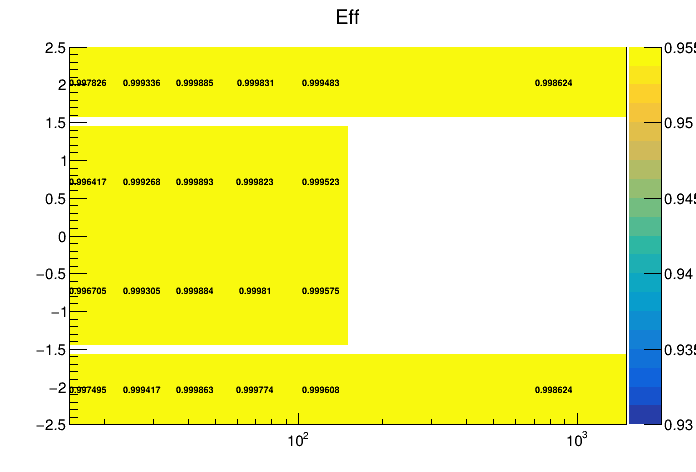

In [22]:
c = TCanvas()
if isConv:
    hist2d.GetZaxis().SetRangeUser(0.93,0.955)
else:
    hist2d.GetZaxis().SetRangeUser(0.55,0.95)
hist2d.Draw("COLZ text")
c.SetLogx()
c.Draw()


python ERROR: cannot open image file "/home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2017/rereco/ee/Optimized/isConv/EFF_mc_photonID.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2017/rereco/ee/Optimized/isConv/EFF_mc_photonID.png


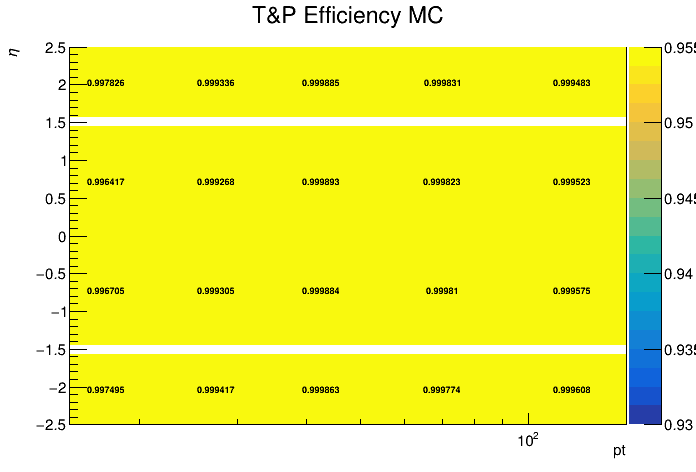

In [23]:
c = TCanvas()
histDraw.SetTitle("T&P Efficiency MC")
if isConv:
    histDraw.GetZaxis().SetRangeUser(0.93,0.955)
else:
    histDraw.GetZaxis().SetRangeUser(0.55,0.95)
    
histDraw.GetXaxis().SetTitle('pt')
histDraw.GetYaxis().SetTitle(r'\eta')

statDraw.SetBarOffset(-0.15)
statDraw.Draw("text same")

histDraw.Draw("COLZ text")
c.SetLogx()
if isConv:
    c.SaveAs(figpath+binsSelected+"/isConv/"+"EFF_mc_photonID.png")
else:
    c.SaveAs(figpath+binsSelected+"/ID/"+"EFF_mc_photonID.png")
c.Draw()


python ERROR: cannot open image file "/home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2017/rereco/ee/Optimized/isConv/EFF_UNC_mc_photonID.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file /home/jcordero/CMS/JYCMCMS/SMP_ZG/figs/2017/rereco/ee/Optimized/isConv/EFF_UNC_mc_photonID.png


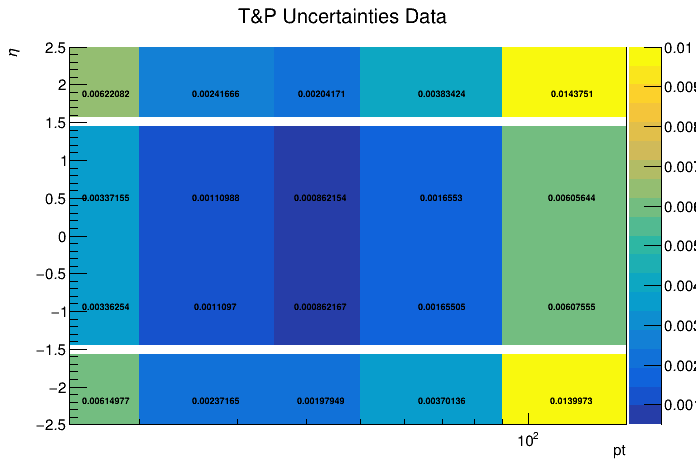

In [24]:
c = TCanvas()
statDraw.SetTitle("T&P Uncertainties Data")
if isConv:
    statDraw.GetZaxis().SetRangeUser(0.0005,0.01)
else:
    statDraw.GetZaxis().SetRangeUser(0,0.006)

statDraw.GetXaxis().SetTitle('pt')
statDraw.GetYaxis().SetTitle(r'\eta')
statDraw.Draw("colz text")
if isConv:
    c.SaveAs(figpath+binsSelected+"/isConv/"+"EFF_UNC_mc_photonID.png")
else:
    c.SaveAs(figpath+binsSelected+"/ID/"+"EFF_UNC_mc_photonID.png")
c.SetLogx()
c.Draw()

In [25]:
fileOut.Close()

In [26]:
MC = {}
DATA = {}

# MC PASS

------------------------ DYJets ------------------------
--- DYJets
--- Electron_2017


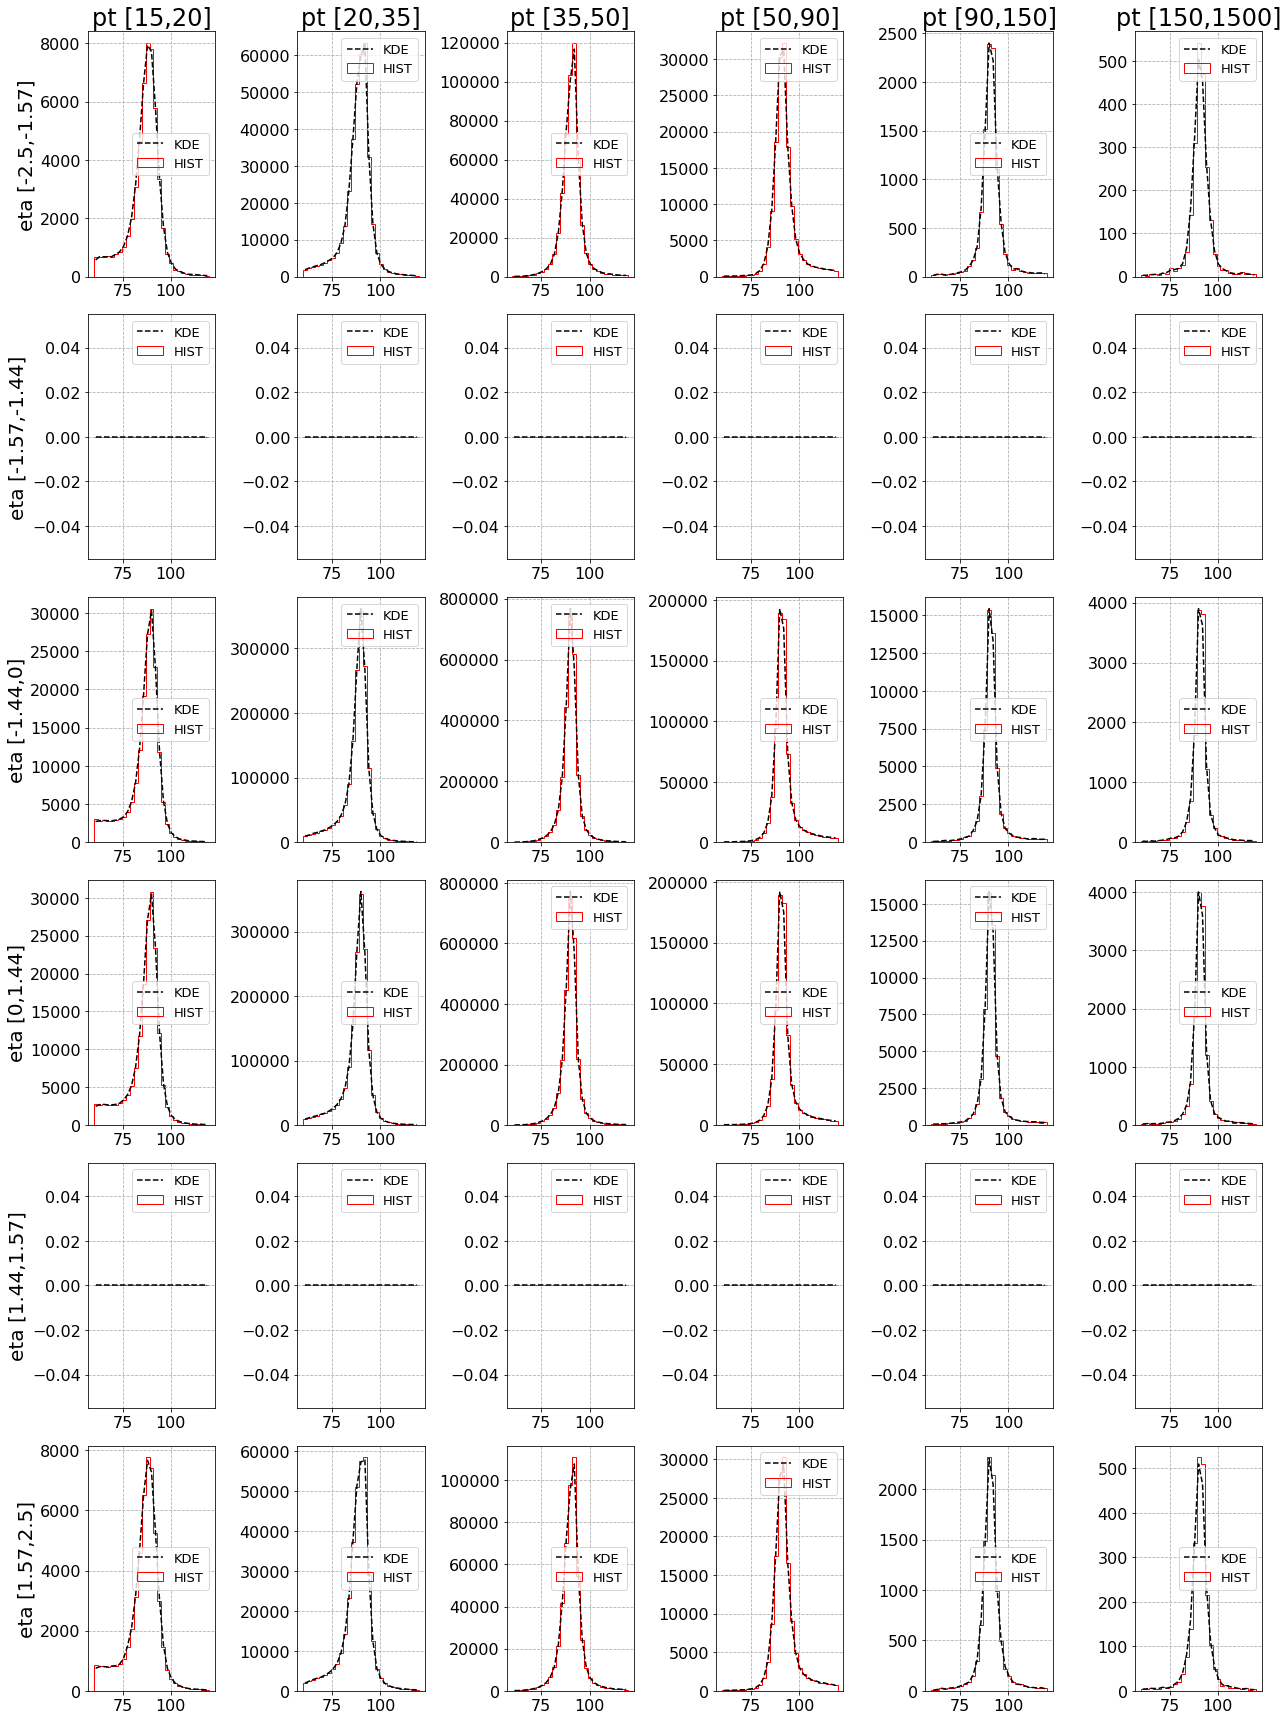

In [27]:
IDPass = False
PassFail = 'Pass'
MC[PassFail] = {}


S = 'DYJets'
print('------------------------',S,'------------------------')
filters = ["ProbeIDPass","ProbeISOPass","ProbeWorstPass","ProbeSigPass"]
for d in dataS:
    d.ResetCuts()
for d in dataS:
    print('---',d.name)
    Ind = EffAna.getIndex(d, filters = filters, flag = True)
    d.AddCuts(Ind)

MC[PassFail][S] = EffAna.EffGrid(
                                sample = dataS[S].GetWithCuts("dileptonM"),
                                dist1  = dataS[S].GetWithCuts(probe+"Pt"),
                                dist2  = dataS[S].GetWithCuts(probe+"Eta"),
                                bins1  = { "pt": EffAna.bins["pt"] },
                                bins2  = {"eta": EffAna.bins["eta"] },
                                Abs1   = False, Abs2   = False,
                                bins = len(xc),
                                ProbeType = PassFail,
                                )

# MC Fail

------------------------ DYJets ------------------------
--- DYJets
--- Electron_2017


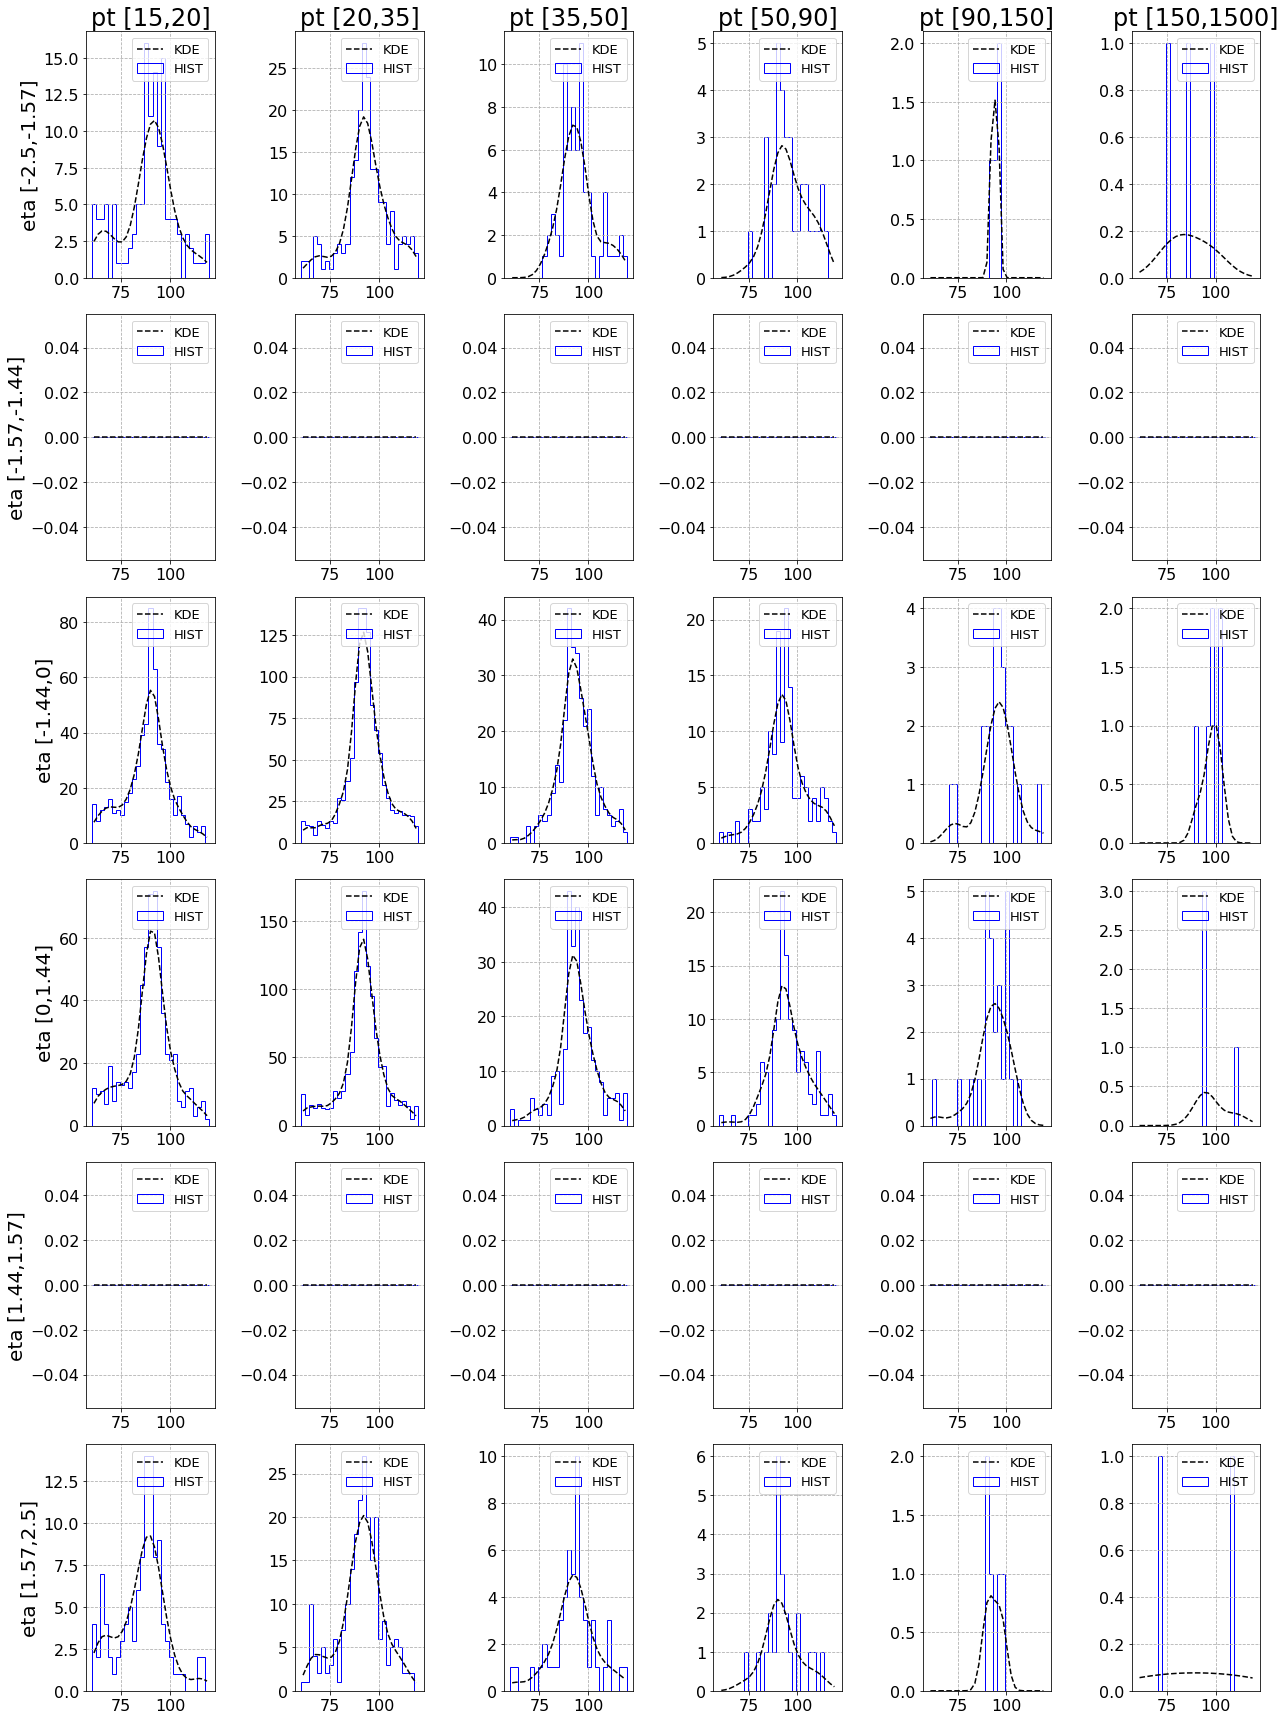

In [28]:
IDPass = False
PassFail = 'Fail'
MC[PassFail] = {}


S = 'DYJets'
print('------------------------',S,'------------------------')
for d in dataS:
    d.ResetCuts()
for d in dataS:
    print('---',d.name)
    Ind = EffAna.getIndex(d, filters = filters, flag = False)
    d.AddCuts(Ind)
    
MC[PassFail][S] = EffAna.EffGrid(
                                sample = dataS[S].GetWithCuts("dileptonM"),
                                dist1  = dataS[S].GetWithCuts(probe+"Pt"),
                                dist2  = dataS[S].GetWithCuts(probe+"Eta"),
                                bins1  = {"pt": EffAna.bins["pt"] },
                                bins2  = {"eta": EffAna.bins["eta"] },
                                Abs1   = False, Abs2   = False,
                                bins = len(xc),
                                ProbeType    = PassFail,
                                )

# DATA Pass

------------------------ Electron_2017 ------------------------
--- DYJets
--- Electron_2017


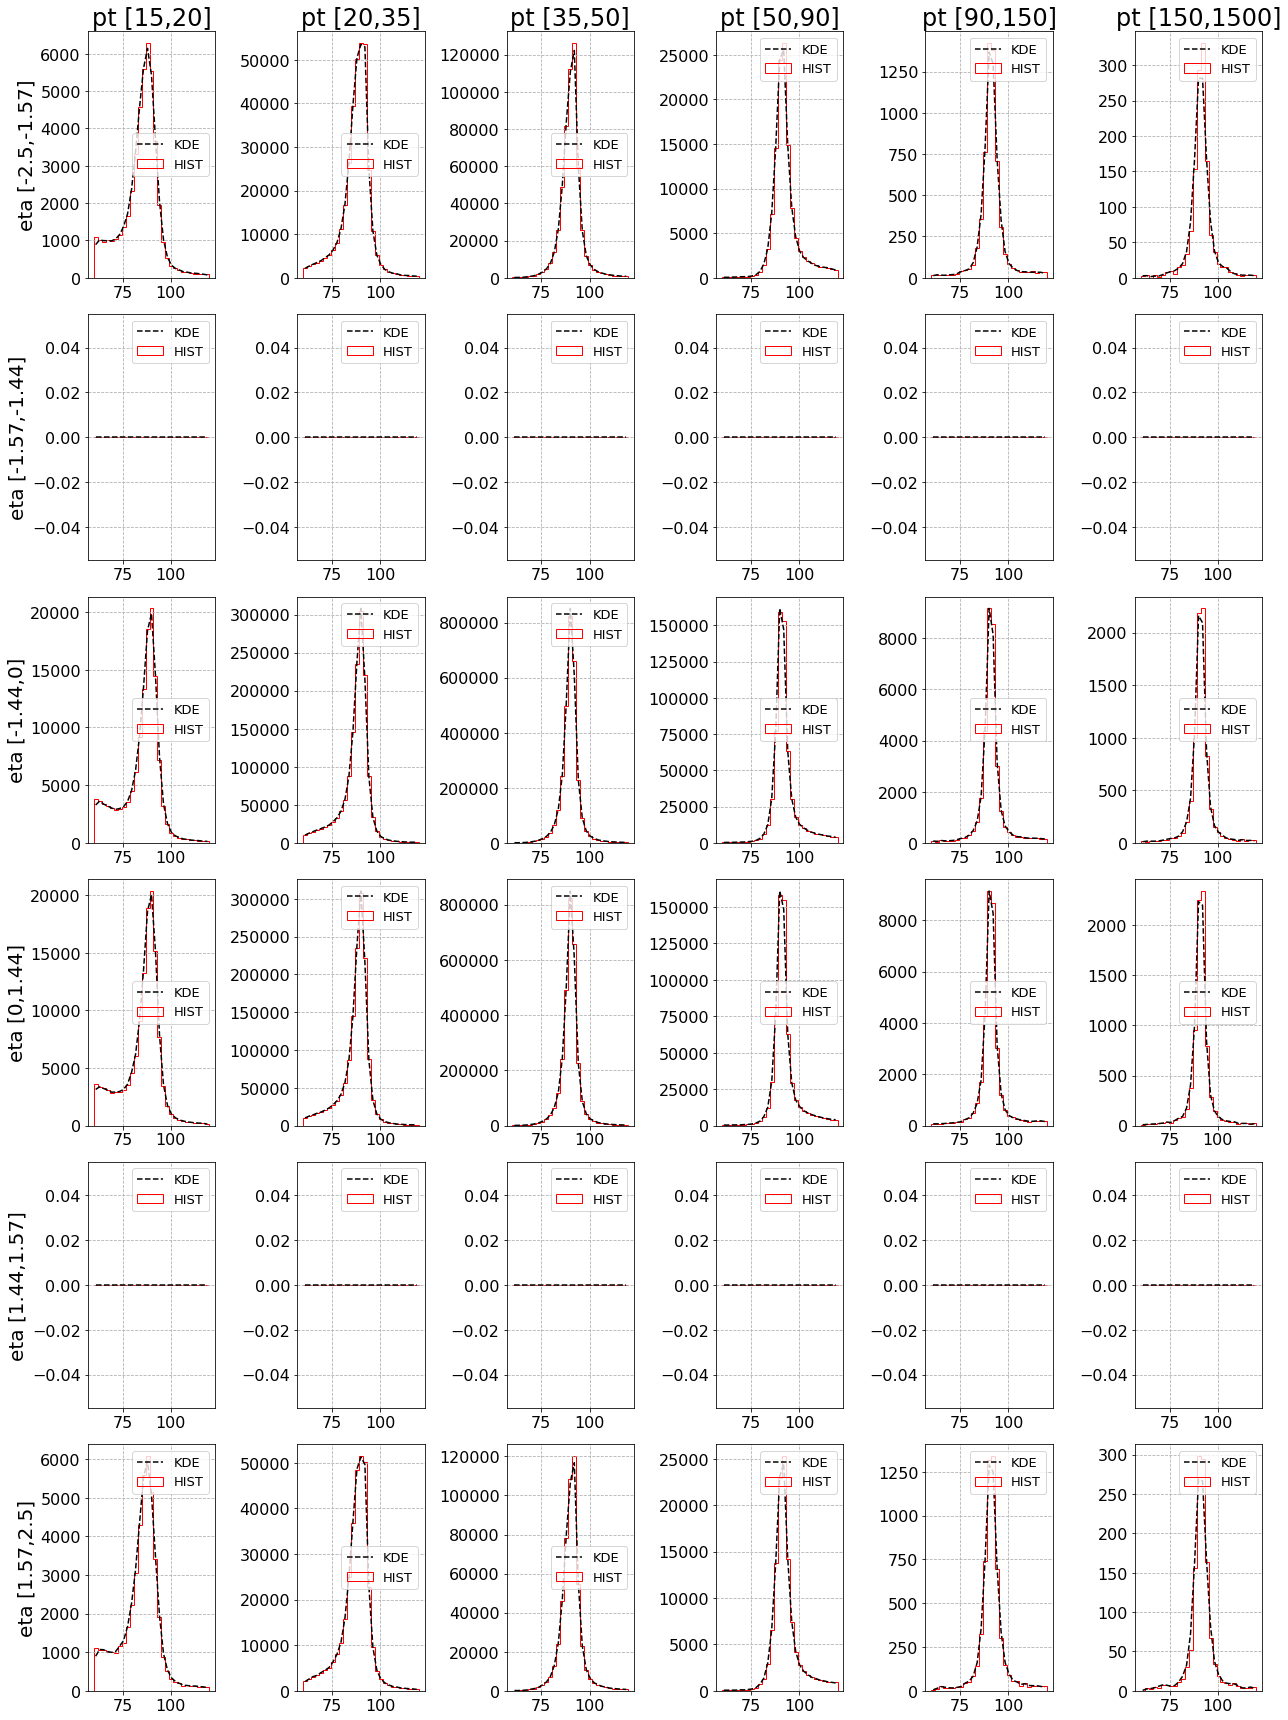

In [126]:
PassFail = 'Pass'
S = "Electron_"+config.era
print('------------------------',S,'------------------------')
for d in dataS:
    d.ResetCuts()
for d in dataS:
    print('---',d.name)
    Ind = EffAna.getIndex(d, filters = filters, flag = True)
    d.AddCuts(Ind)
    
DATA[PassFail] = EffAna.EffGrid(
                                sample = dataS[S].GetWithCuts("dileptonM"),
                                dist1  = dataS[S].GetWithCuts(probe+"Pt"),
                                dist2  = dataS[S].GetWithCuts(probe+"Eta"),
                                bins1  = { "pt": EffAna.bins["pt"] },
                                bins2  = {"eta": EffAna.bins["eta"] },
                                Abs1   = False,
                                Abs2   = False,
                                bins = len(xc),
                                ProbeType    = PassFail,
                                )

# DATA Fail

------------------------ Electron_2017 ------------------------
--- DYJets
--- Electron_2017


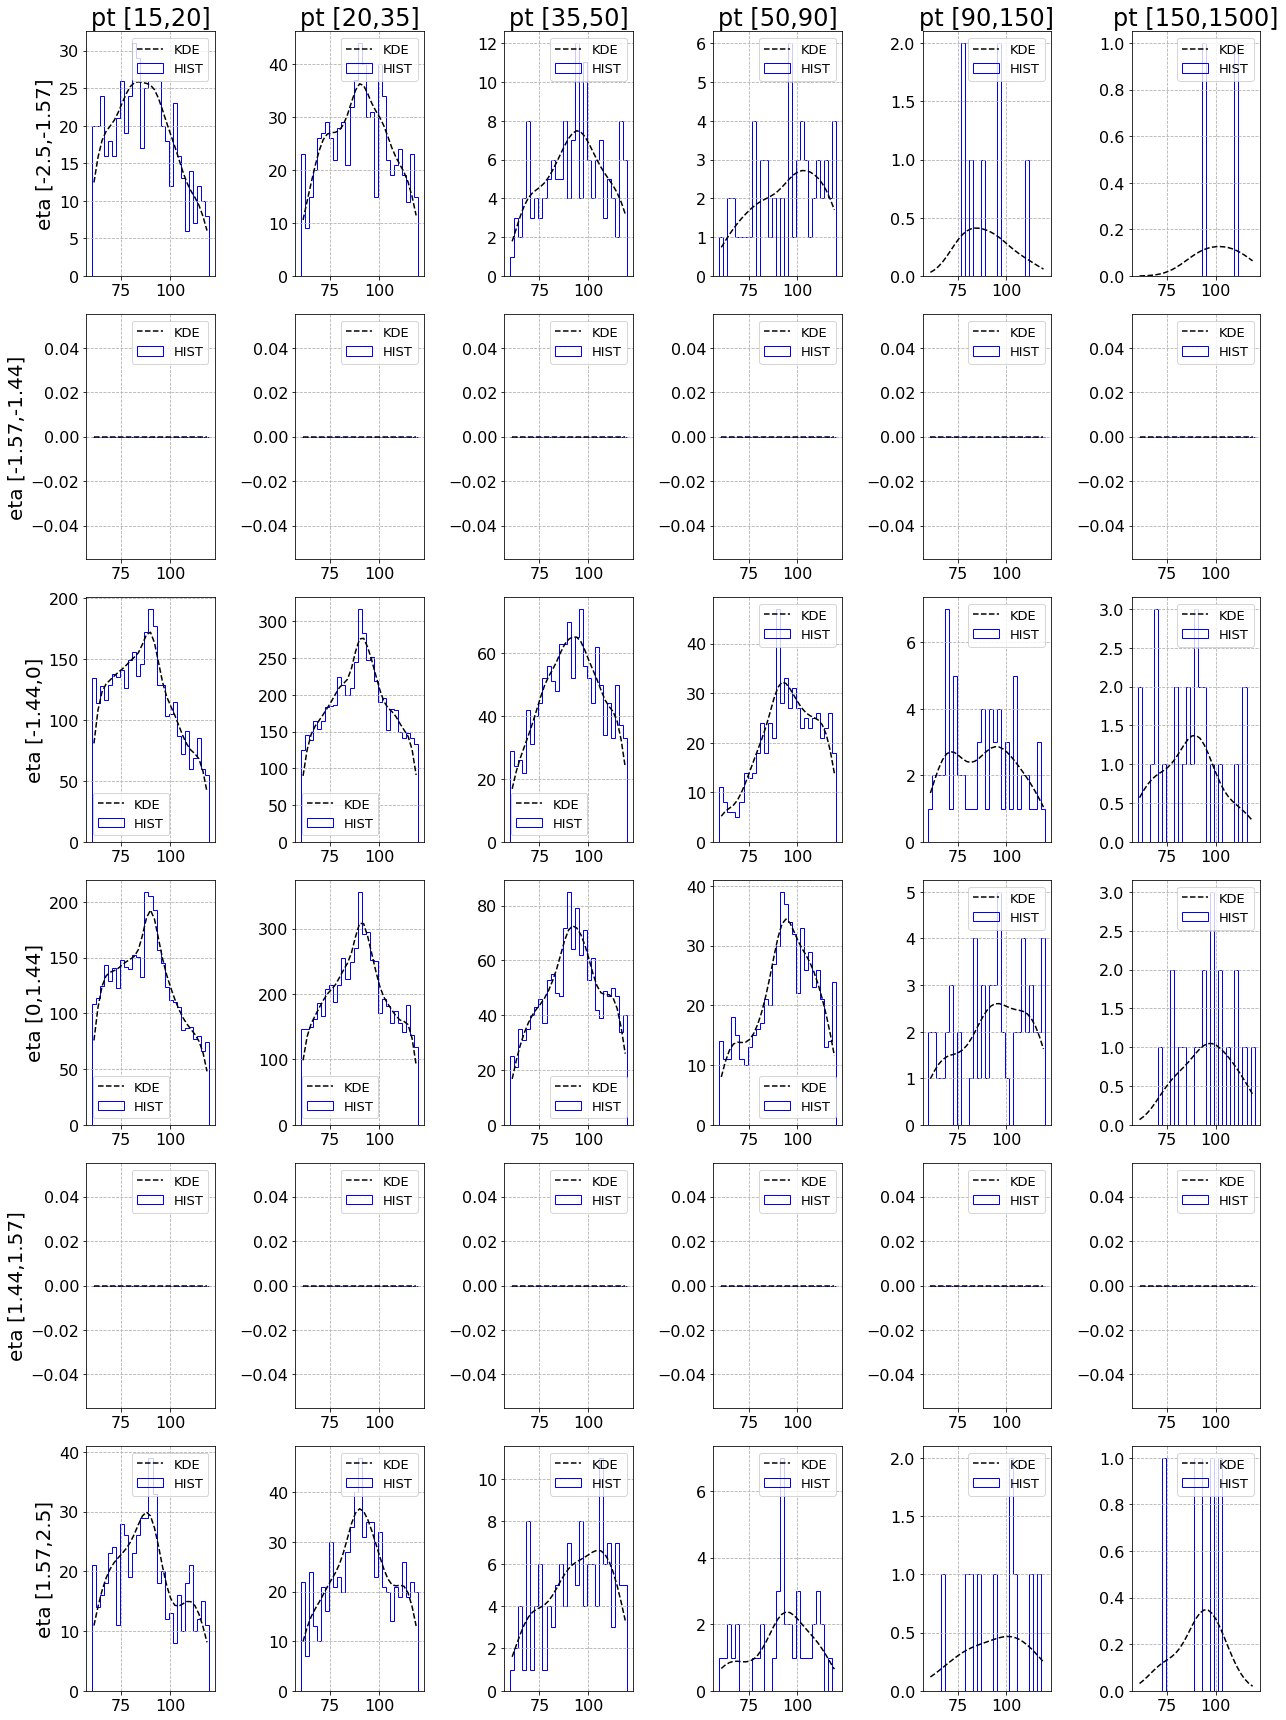

In [127]:
PassFail = 'Fail'
S = "Electron_"+config.era
print('------------------------',S,'------------------------')
for d in dataS:
    d.ResetCuts()
for d in dataS:
    print('---',d.name)
    Ind = EffAna.getIndex(d, filters = filters, flag = False)
    d.AddCuts(Ind)
    
DATA[PassFail] = EffAna.EffGrid(
                                sample = dataS[S].GetWithCuts("dileptonM"),
                                dist1  = dataS[S].GetWithCuts(probe+"Pt"),
                                dist2  = dataS[S].GetWithCuts(probe+"Eta"),
                                bins1  = {"pt": EffAna.bins["pt"] },
                                bins2  = {"eta": EffAna.bins["eta"] },
                                Abs1   = False, Abs2   = False,
                                bins = len(xc),
                                ProbeType    = PassFail,
                                )

# Fitting

In [128]:
def T(NSigPass, NBkgPass, NSigFail,NBkgFail, 
      alphaPass, betaPass, peakPass, gammaPass,
      alphaFail, betaFail, peakFail, gammaFail,
       MCPass, MCFail
     ):
    x = np.arange(0,len(MCPass))
    
    Pass = list(Template(NSigPass, NBkgPass, 
                         MCPass  , Help.Math.RooCMSShape(x,*(alphaPass, betaPass, peakPass, gammaPass)))) 
    
    Fail = list(Template(NSigFail, NBkgFail, 
                         MCFail, Help.Math.RooCMSShape(x,*(alphaFail, betaFail, peakFail, gammaFail))))
    Temp = np.array(Pass + Fail )
    return Temp

In [129]:
def PlotFitting(ax,
                NSig ,NBkg,
                DATA, SIG, BKG,
                eta, pt,
                color,
               ):
    TemplatePlot    = Help.Stat.Template(NSig,NBkg, SIG, BKG)
    TemplatePlotBkg = NBkg*BKG/np.sum(BKG)
    DataPlot        = DATA
        
    ax.plot(xc,    TemplatePlot, color = color[0], linestyle='--', label=    'Fit')
    ax.plot(xc, TemplatePlotBkg, color = color[1], linestyle='--', label='Fit Bkg')
    ax.plot(xc,        DataPlot, color = color[2], linestyle= '-', label=   'Data')

    ax.legend()
    ax.grid(linestyle='--')

    if j == 0:
        ax.set_ylabel('Eta ['+str(round(eta[0],2))+','+str(round(eta[1],2))+']'  )        
    if i == 0:
        ax.set_title('Pt ['+str(pt[0])+','+str(pt[1])+']' )

# Fitting with RooCMSShape

In [130]:
def SkipGap(i,j,binsSelect):
    gapFlag = False
    
    if     binsSelected == "Optimized":
        if (i == 1 or i == 4) and j != 5:
            gapFlag = True
    elif   binsSelected == "Plots":
        if (i == 1 or i == 4) and j != 11:
            gapFlag = True
    elif   binsSelected == "Hien":
        if (i == 1 or i == 4) and j != 6:
            gapFlag = True
    
    return gapFlag

In [131]:
pPass = [
        5e3,   5e3, 
        0.1, 1, 14,       # Voigt
        1,0.1, 0.01, 0.09,  # RooCMS
        ]
pFail = [
        1.5e3,   5e4, 
        1, 1.2, 43,       # Voigt
        30,0.1, 0.01, 0.09,  # RooCMS
        ]


fit = EffAna.Fit_Curve_CHI(
                DATA_PASS = DATA['Pass'][0][3][3],
                DATA_FAIL = DATA['Fail'][0][3][3],
                pPass = pPass,pFail = pFail,
                Bounded = EffAna.getBounds()
                )

#fit
m = fit[-1]

print("--")


--


In [132]:
fit

([9.699652898098599,
  2.3637340007542917,
  2.404016225290703,
  2.750914378560915,
  22.608161108160964,
  0.028298582041708653,
  0.1871652598046814,
  -77.65321612730622,
  0.16334892750463814],
 [0.14913018153706048,
  0.13775032947638266,
  0.07853472560812336,
  2.915647607618834,
  40.60590409180915,
  28.506903385295292,
  -0.10337198246550097,
  0.010196266695857048,
  -0.10406670593812806],
 [nan, nan, nan, nan, nan, nan, nan, nan, nan],
 [nan, nan, nan, nan, nan, nan, nan, nan, nan],
 <iminuit._libiminuit.Minuit at 0x5649cdaa1d98>)

In [133]:
##################################################################

'''
VoigtCMS = lambda x,*x0 : Voigt_CMS(
                                        x,
                                        NSig  =  x0[0], NBkg  =  x0[1],
                                        sig   =  x0[2], Gamma =  x0[3], mean =  x0[4],
                                        alpha =  x0[5], beta  =  x0[6], peak =  x0[7], gamma = x0[8], 
                                        )
xFit = np.arange(0,len(Data['Pass'][0][3][3]))
chi2 = lambda *x0 : CHI2(Data['Pass'][0][3][3],VoigtCMS(xFit,*x0))
chi2(pPass)                                        
'''         
xFit = np.arange(0,len(DATA['Pass'][0][3][3]))
chi2 =lambda NSig , NBkg , \
             sig  , Gamma, mean, \
             alpha, beta , peak, gamma : Help.Stat.CHI2(   DATA['Pass'][0][3][3],
                                                Help.Voigt_CMS(
                                                    xc = xFit, \
                                                    NSig=NSig , NBkg=NBkg , \
                                                    sig = sig  , Gamma  = Gamma, mean = mean, \
                                                    alpha = alpha, beta = beta , peak = peak, gamma = gamma,  
                                                    ) 
                                                )
print(chi2(*pPass) )

7173405.984295485


In [134]:
x0 = pPass

BoundedFit = [
               [0,0,
                0,0,10,
                0,-0.2,-1000,-1],
               [np.inf,np.inf,
                3,3,48,
                70,0.2,1000,1,
                ]
            ] 

'''
errorFit = [1,1,
            0.01,0.1,1,0.1,
            0.01,0.001,0.001
           ]
'''

errorFit = [1,1,
            0.001,0.01,1,0.01,
            0.001,0.001,0.001
           ]

m = Minuit( chi2,
            NSig  =  x0[0], NBkg  =  x0[1],
            sig   =  x0[2], Gamma =  x0[3], mean =  x0[4],
            alpha =  x0[5], beta  =  x0[6], peak =  x0[7], gamma = x0[8], 
            error_NSig  =  errorFit[0], error_NBkg  =  errorFit[1],
            error_sig   =  errorFit[2], error_Gamma =  errorFit[3], error_mean =  errorFit[4],
            error_alpha =  errorFit[5], error_beta  =  errorFit[6], error_peak =  errorFit[7], error_gamma = errorFit[8], 
            limit_NSig  =  (BoundedFit[0][0],BoundedFit[1][0]), limit_NBkg  =  (BoundedFit[0][1],BoundedFit[1][1]),
            limit_sig   =  (BoundedFit[0][2],BoundedFit[1][2]), limit_Gamma =  (BoundedFit[0][3],BoundedFit[1][3]), limit_mean =  (BoundedFit[0][4],BoundedFit[1][4]),
            limit_alpha =  (BoundedFit[0][5],BoundedFit[1][5]), limit_beta  =  (BoundedFit[0][6],BoundedFit[1][6]), limit_peak =  (BoundedFit[0][7],BoundedFit[1][7]), limit_gamma = (BoundedFit[0][8],BoundedFit[1][8]), 
            errordef = 0.5,
          )
    
m.get_param_states()

-------------------------------------------------------------------------------------------
|   | Name  |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
-------------------------------------------------------------------------------------------
| 0 | NSig  |  0.500E4  |  0.000E4  |            |            |    0    |         |       |
| 1 | NBkg  |  0.500E4  |  0.000E4  |            |            |    0    |         |       |
| 2 | sig   | 1.000E-1  | 0.010E-1  |            |            |    0    |    3    |       |
| 3 | Gamma |   1.000   |   0.010   |            |            |    0    |    3    |       |
| 4 | mean  |   14.0    |    1.0    |            |            |   10    |   48    |       |
| 5 | alpha |   1.000   |   0.010   |            |            |    0    |   70    |       |
| 6 | beta  | 1.000E-1  | 0.010E-1  |            |            |  -0.2   |   0.2   |       |
| 7 | peak  |  1.00E-2  |  0.10E-2  |            |            |  -1000  |  1000   |       |
| 8 | gamma | 0.900E-1  | 0.010E-1  |            |            |   -1    |    1    |       |
-------------------------------------------------------------------------------------------

In [135]:
'''
chi2(*x0)

chi2(NSig  =  x0[0], NBkg  =  x0[1],
    sig   =  x0[2], Gamma =  x0[3], mean =  x0[4],
    alpha =  x0[5], beta  =  x0[6], peak =  x0[7], gamma = x0[8], )
'''
m.migrad()


------------------------------------------------------------------
| FCN = 0.03103                 |     Ncalls=253 (253 total)     |
| EDM = 1.98E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
-------------------------------------------------------------------------------------------
|   | Name  |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
-------------------------------------------------------------------------------------------
| 0 | NSig  |   0.10    |   1.57    |            |            |    0    |         |       |
| 1 | NBkg  |   0.26    |   2.45    |            |            |    0    |         |       |
| 2 | sig   |   2.760   |   0.001   |            |            |    0    |    3    |       |
| 3 | Gamma |   2.270   |   0.001   |            |            |    0    |    3    |       |
| 4 | mean  |  22.732   |   0.005   |            |            |   10    |   48    |       |
| 5 | alpha |   0.362   |   0.006   |            |            |    0    |   70    |       |
| 6 | beta  | 1.286E-1  | 0.002E-1  |            |            |  -0.2   |   0.2   |       |
| 7 | peak  |   0.21    |  1462.03  |            |            |  -1000  |  1000   |       |
| 8 | gamma | 1.153E-1  | 0.001E-1  |            |            |   -1    |    1    |       |
-------------------------------------------------------------------------------------------

In [136]:
m.get_fmin()

------------------------------------------------------------------
| FCN = 0.03103                 |     Ncalls=253 (253 total)     |
| EDM = 1.98E-05 (Goal: 5E-06)  |            up = 0.5            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------

In [137]:
pprint(m.get_fmin())

FMin(fval=0.031027765141044304, edm=1.9779206330773506e-05, tolerance=0.1, nfcn=253, ncalls=253, up=0.5, is_valid=True, has_valid_parameters=True, has_accurate_covar=True, has_posdef_covar=True, has_made_posdef_covar=False, hesse_failed=False, has_covariance=True, is_above_max_edm=False, has_reached_call_limit=False)


In [138]:
States = m.get_param_states()

pprint(m.get_param_states())

[Param(number=0, name='NSig', value=0.09621955061758047, error=1.5668098885596997, is_const=False, is_fixed=False, has_limits=True, has_lower_limit=True, has_upper_limit=False, lower_limit=0.0, upper_limit=None),
 Param(number=1, name='NBkg', value=0.25638436348338134, error=2.4515049937218403, is_const=False, is_fixed=False, has_limits=True, has_lower_limit=True, has_upper_limit=False, lower_limit=0.0, upper_limit=None),
 Param(number=2, name='sig', value=2.759752985206525, error=0.0007599070743491421, is_const=False, is_fixed=False, has_limits=True, has_lower_limit=True, has_upper_limit=True, lower_limit=0.0, upper_limit=3.0),
 Param(number=3, name='Gamma', value=2.269930782805117, error=0.0011201163888425736, is_const=False, is_fixed=False, has_limits=True, has_lower_limit=True, has_upper_limit=True, lower_limit=0.0, upper_limit=3.0),
 Param(number=4, name='mean', value=22.731796129947504, error=0.005215053472515052, is_const=False, is_fixed=False, has_limits=True, has_lower_limit=T

In [139]:
#m.hesse()

In [140]:
m.matrix(correlation=True)

--------------------------------------------------------------------------
|       |   NSig   NBkg    sig  Gamma   mean  alpha   beta   peak  gamma |
--------------------------------------------------------------------------
|  NSig |  1.000  0.132  0.030  0.034  0.001 -0.004  0.004  0.000  0.011 |
|  NBkg |  0.132  1.000 -0.053 -0.061 -0.000  0.007 -0.008 -0.000 -0.022 |
|   sig |  0.030 -0.053  1.000 -0.015 -0.000  0.001 -0.002 -0.000 -0.005 |
| Gamma |  0.034 -0.061 -0.015  1.000 -0.000  0.002 -0.002 -0.000 -0.005 |
|  mean |  0.001 -0.000 -0.000 -0.000  1.000  0.000 -0.000 -0.000 -0.000 |
| alpha | -0.004  0.007  0.001  0.002  0.000  1.000  0.000  0.000  0.000 |
|  beta |  0.004 -0.008 -0.002 -0.002 -0.000  0.000  1.000 -0.000 -0.001 |
|  peak |  0.000 -0.000 -0.000 -0.000 -0.000  0.000 -0.000  1.000 -0.000 |
| gamma |  0.011 -0.022 -0.005 -0.005 -0.000  0.000 -0.001 -0.000  1.000 |
--------------------------------------------------------------------------

In [141]:
m.matrix()

--------------------------------------------------------------------------------------------
|       |     NSig     NBkg      sig    Gamma     mean    alpha     beta     peak    gamma |
--------------------------------------------------------------------------------------------
|  NSig |  0.000E9  0.000E9  0.000E9  0.000E9  0.000E9 -0.000E9  0.000E9  0.000E9  0.000E9 |
|  NBkg |  0.000E9  0.000E9 -0.000E9 -0.000E9 -0.000E9  0.000E9 -0.000E9 -0.000E9 -0.000E9 |
|   sig |  0.000E9 -0.000E9  0.000E9 -0.000E9 -0.000E9  0.000E9 -0.000E9 -0.000E9 -0.000E9 |
| Gamma |  0.000E9 -0.000E9 -0.000E9  0.000E9 -0.000E9  0.000E9 -0.000E9 -0.000E9 -0.000E9 |
|  mean |  0.000E9 -0.000E9 -0.000E9 -0.000E9  0.000E9  0.000E9 -0.000E9 -0.000E9 -0.000E9 |
| alpha | -0.000E9  0.000E9  0.000E9  0.000E9  0.000E9  0.000E9  0.000E9  0.000E9  0.000E9 |
|  beta |  0.000E9 -0.000E9 -0.000E9 -0.000E9 -0.000E9  0.000E9  0.000E9 -0.000E9 -0.000E9 |
|  peak |  0.000E9 -0.000E9 -0.000E9 -0.000E9 -0.000E9  0.000E9 -0.000E9  0.537E9 -0.000E9 |
| gamma |  0.000E9 -0.000E9 -0.000E9 -0.000E9 -0.000E9  0.000E9 -0.000E9 -0.000E9  0.000E9 |
--------------------------------------------------------------------------------------------

In [142]:
m.errors

<ErrorView of Minuit at 5649cd53fac8>
  NSig: 1.5668098885596997
  NBkg: 2.4515049937218403
  sig: 0.0007599070743491421
  Gamma: 0.0011201163888425736
  mean: 0.005215053472515052
  alpha: 0.005665366800971239
  beta: 0.00021999212871326446
  peak: 1462.028017929289
  gamma: 8.54800836590508e-05

In [143]:
m.values

<ValueView of Minuit at 5649cd53fac8>
  NSig: 0.09621955061758047
  NBkg: 0.25638436348338134
  sig: 2.759752985206525
  Gamma: 2.269930782805117
  mean: 22.731796129947504
  alpha: 0.3620135160363086
  beta: 0.12861285515243742
  peak: 0.212201528633841
  gamma: 0.11534373269250353

In [144]:
fit

([9.699652898098599,
  2.3637340007542917,
  2.404016225290703,
  2.750914378560915,
  22.608161108160964,
  0.028298582041708653,
  0.1871652598046814,
  -77.65321612730622,
  0.16334892750463814],
 [0.14913018153706048,
  0.13775032947638266,
  0.07853472560812336,
  2.915647607618834,
  40.60590409180915,
  28.506903385295292,
  -0.10337198246550097,
  0.010196266695857048,
  -0.10406670593812806],
 [nan, nan, nan, nan, nan, nan, nan, nan, nan],
 [nan, nan, nan, nan, nan, nan, nan, nan, nan],
 <iminuit._libiminuit.Minuit at 0x5649cdaa1d98>)

In [145]:
def assErr(k,N):
    a, b = 0.001,1
    steps = 1000
    beta = np.arange(a,b,step = (b-a)/steps)

    Beta  = spc.betainc(k+1,N-k+1,beta)
    Sols = [[100 if np.isnan(Bs-As-lamb) else np.abs(Bs-As-lamb) for Bs in Beta] for As in Beta]

    i = int(np.argmin(Sols)/steps)
    j = int(np.argmin(Sols)- i*steps)

    intLow, intHigh = beta[i],beta[j]
    print(np.argmin(Sols),np.min(Sols),Sols[i][j])
    print(i,j)


In [146]:
def OptYield(P0,model,index = 0,Ni=0,Nf=2e6,step=100,Plot=True):
    mod = []
    lambP = np.arange(Ni,Nf,step = step) #LAMB 0


    for p1 in lambP:
        P0[index] = p1
        mod.append(model(P0))
        
    if Plot:
        plt.figure()
        plt.plot(lambP,mod)
        ax = plt.gca()
        ax.set_yscale('log')

    return lambP[np.argmin(mod)]

In [147]:
import json
with open(config.projectdir+"json/plot/eff_fit_ini.json") as f:
    Js = f.read()
M = json.loads(Js)

In [148]:
print(M["Optimized"]["convVeto"]["bins4"]["bins3"]["pass"])
print(M["bounds"]["min"])

[5000.0, 200, 0.1, 1, 15, 15, 1, 10, -0.09]
[0, 0, 0, 0, 10, 0, -0.3, -10000000.0, -0.9]


In [149]:
def InitializeParams(i,j,Type, isConv):
    bounds = EffAna.getBounds()
    pPass = EffAna.getFit(isConv,j,i,"pass")
    pFail = EffAna.getFit(isConv,j,i,"fail")
    return pPass, pFail, bounds

 Plotting i0 j0
--- Fitting
Nsig:  0.06737539987861174
eff:  0.5522139732207465  | deff  nan
--- Plotting Pass
--- Plotting Fail


 Plotting i1 j0
 Plotting i2 j0
--- Fitting
Nsig:  0.06423637873051202
eff:  0.9380240497031294  | deff  20.84250430686477
--- Plotting Pass
--- Plotting Fail


 Plotting i3 j0
--- Fitting
Nsig:  0.0650790481624064
eff:  0.7685546365247777  | deff  nan
--- Plotting Pass
--- Plotting Fail


 Plotting i4 j0
 Plotting i5 j0
--- Fitting
Nsig:  0.0021984611462579906
eff:  0.013339703277290659  | deff  nan
--- Plotting Pass
--- Plotting Fail


 Plotting i0 j1
--- Fitting
Nsig:  0.456595866966202
eff:  0.8107382066889707  | deff  nan
--- Plotting Pass
--- Plotting Fail


 Plotting i1 j1
 Plotting i2 j1
--- Fitting
Nsig:  0.34258082122701317
eff:  0.6702703480184662  | deff  nan
--- Plotting Pass
--- Plotting Fail


 Plotting i3 j1
--- Fitting
Nsig:  0.14371931370512847
eff:  0.4503447687697508  | deff  nan
--- Plotting Pass
--- Plotting Fail


 Plotting i4 j1
 Plo

/home/jcordero/CMS/SMP_ZGamma/python/Common/CommonHelper.py:228: RuntimeWarning: divide by zero encountered in true_divide
  return np.sum((Exp-Obs)**2/np.sqrt(Exp))


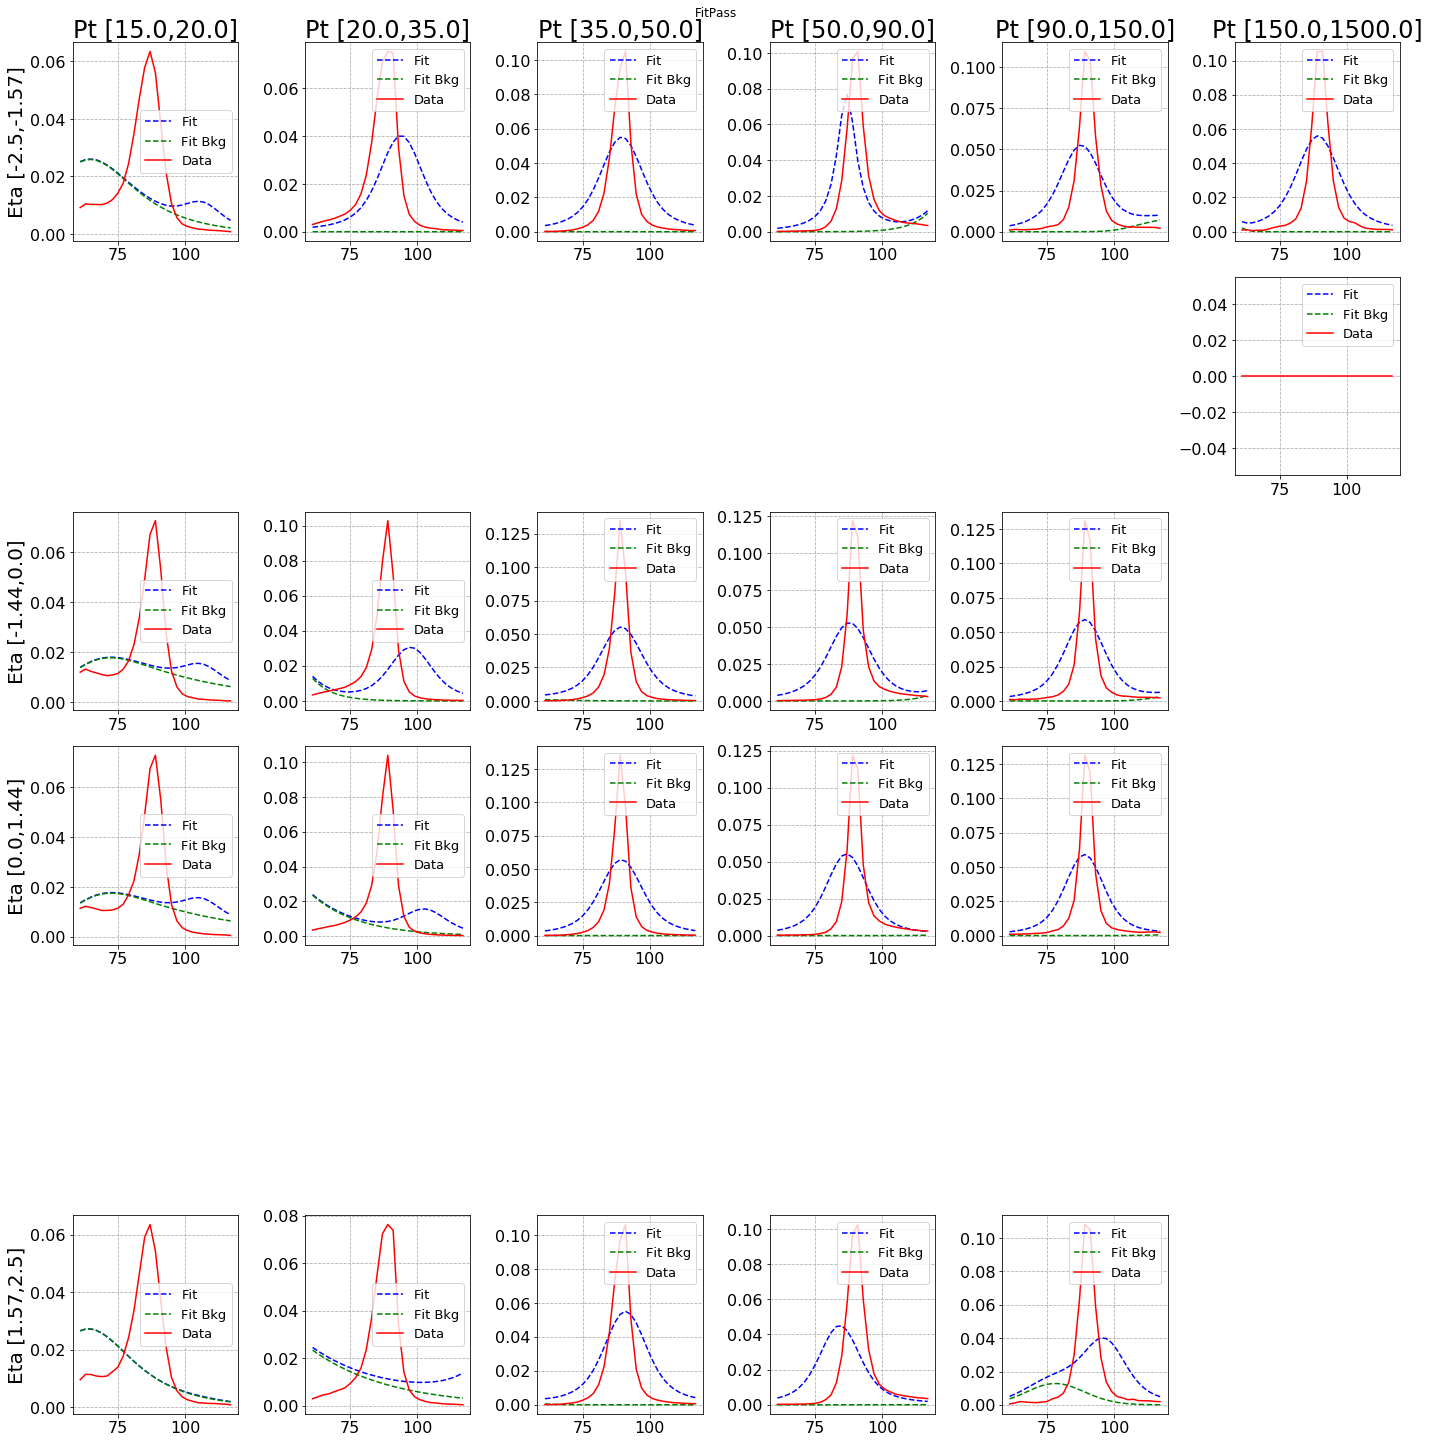

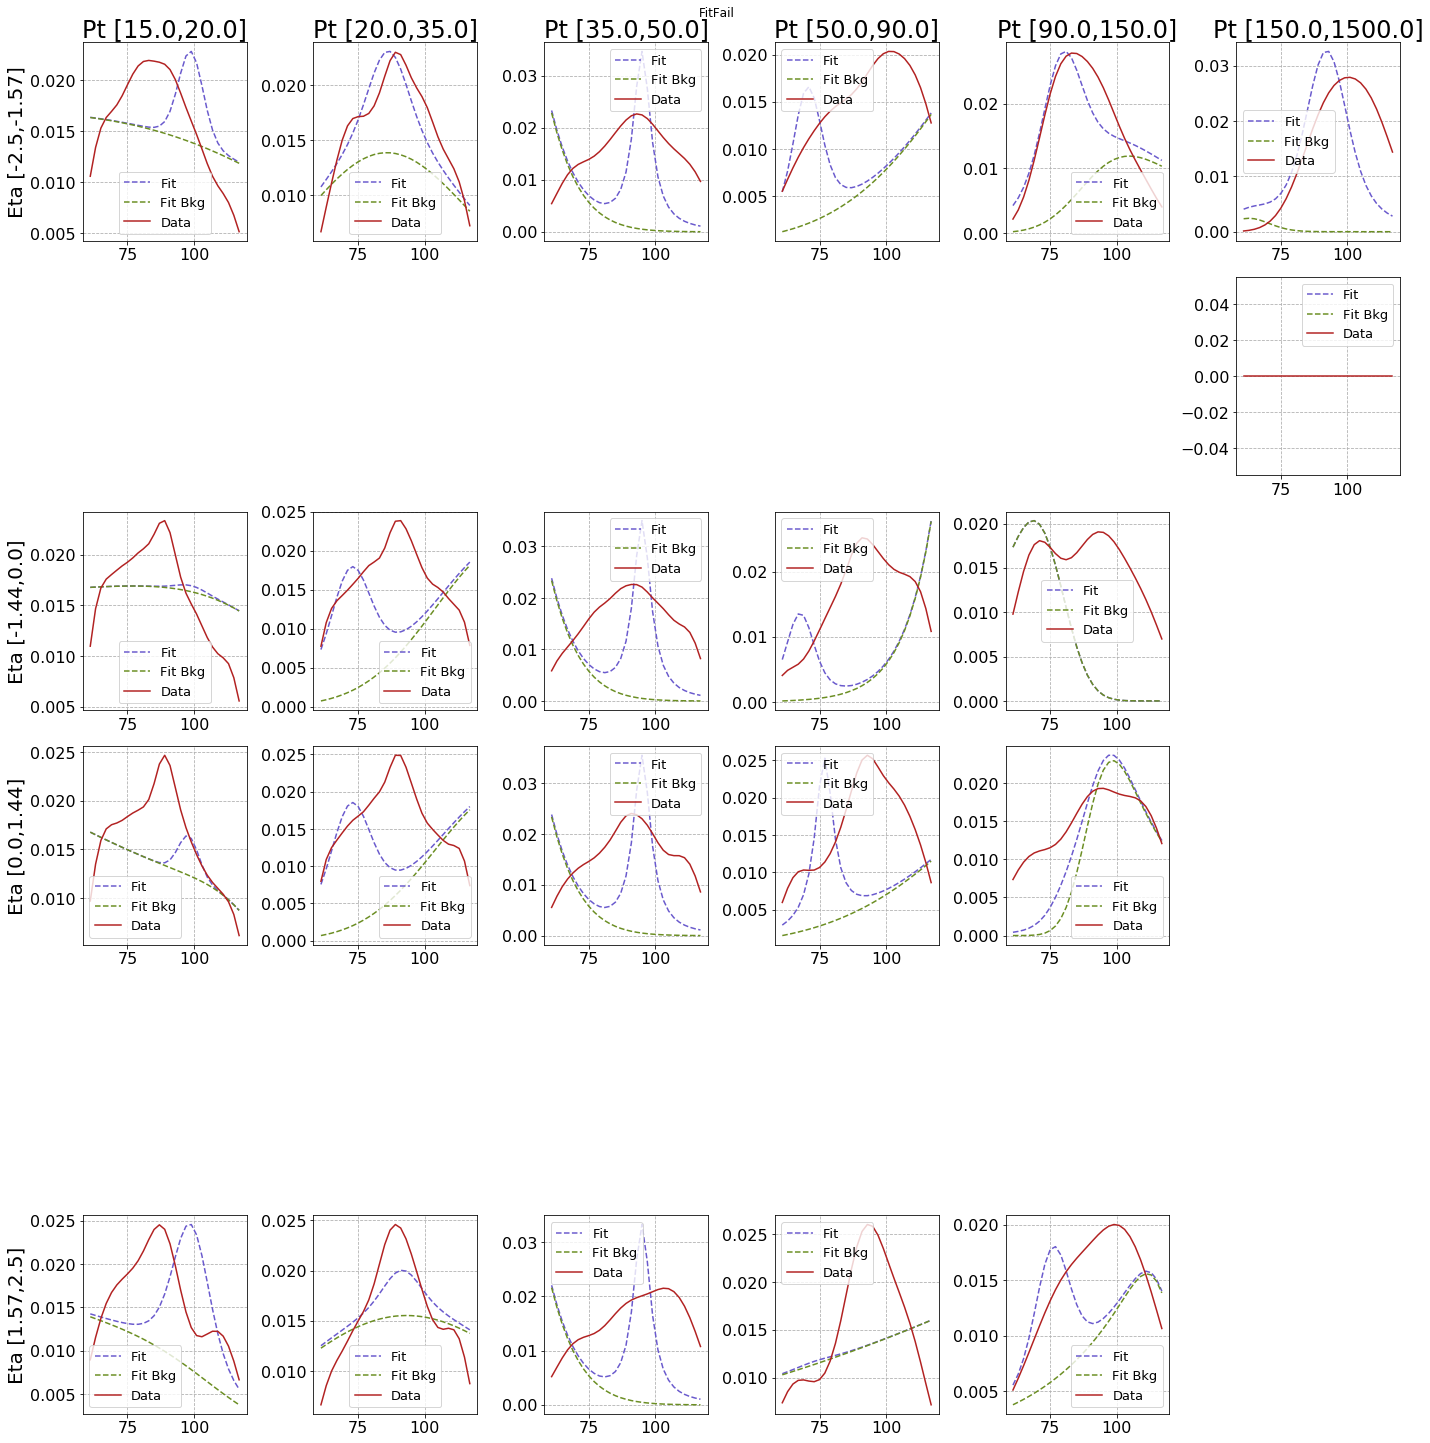

In [151]:
###################################

#FitType = 'Voigt_Exp'
#FitType = 'Voigt_CMS'
FitType = 'Voigt_Curve'

###################################      
    
etaBinsEBEE    = [[0,1.4442],[1.566,2.5]]
etaBins,ptBins = Help.Plot.BinFormat(etaBins), Help.Plot.BinFormat(ptBins)
etaNBin,ptNBin = len(etaBins),len(ptBins)

eff, effStat  = {}, {}

fit = []
fig  =  plt.figure(1,figsize=(20,20))
fig1 =  plt.figure(2,figsize=(20,20))

for j in np.arange(ptNBin):
    if j in BinEBEE:
        etaBINS = etaBinsEBEE
    else:
        etaBINS = etaBins
    eff[j],effStat[j] = {},{}
    for i in np.arange(len(etaBINS)):
        
        #if j != 3 or i != 3:
        #    continue
            
            
        ij = ptNBin*i + (j+1)     
        IJ = i + (j*etaNBin)
        
        print(' Plotting i'+str(i)+' j'+str(j))
        
        
        if   FitType == 'MC_Exp':
            p0 = [
                    1e5,   1e3, 1e4,   1e3,
                    1, 0.2, 1,   0.2,
                    1, 0.2, 1,   0.2
                    ]

            Bounded = ((0,np.inf),(0,np.inf),(0,np.inf),(0,np.inf),
                       (-np.inf,np.inf),(-np.inf,np.inf),(-np.inf,np.inf),(-np.inf,np.inf),
                       (-np.inf,np.inf),(-np.inf,np.inf),(-np.inf,np.inf),(-np.inf,np.inf))

            Temp = lambda   NSigPass, NBkgPass, NSigFail,NBkgFail,      \
                                alphaPass, betaPass, peakPass, gammaPass,   \
                                alphaFail, betaFail, peakFail, gammaFail:   \
                                T(NSigPass, NBkgPass, NSigFail,NBkgFail,    \
                                  alphaPass, betaPass, peakPass, gammaPass, \
                                  alphaFail, betaFail, peakFail, gammaFail, \
                                  MCPass = MC_PASS_S, MCFail = MC_FAIL_S)    
        elif FitType == 'Voigt_Exp':
            p0 = [
                    1e3,   1e5, 5e3,   1e5,
                    0.1, 0.1, 14,
                    0.03, 0,
                    0.1, 0.1, 14,
                    0.03, 0,
                    ]
            Bounded = (
                        (0,np.inf),(0,np.inf),(0,np.inf),(0,np.inf),
                        (0.01,4),(0.01,4),(0,40),
                        (-10,10),(0,np.inf),
                        (0.01,4),(0.01,4),(0,40),
                        (-10,10),(0,np.inf),
                      )

            Temp = lambda   NSigPass, NBkgPass, NSigFail,NBkgFail,             \
                            sigPass, GammaPass, meanPass, lambdaPass, xPass,   \
                            sigFail, GammaFail, meanFail, lambdaFail, xFail:   \
                            TVoigt_Test(NSigPass, NBkgPass, NSigFail,NBkgFail, \
                                        sigPass, GammaPass, meanPass,          \
                                        lambdaPass, xPass,                     \
                                        sigFail, GammaFail, meanFail,          \
                                        lambdaFail, xFail,                     \
                                        MCPass = MC_PASS_S, MCFail = MC_FAIL_S)    
        elif FitType == "Voigt_noSig":
            p0 = [
                    1e5,   1e5,
                    0.1, 0.1, 14,
                    0.03, 0,
                    0.1, 0.1, 14,
                    0.03, 0,
                    ]
            Bounded = (
                        (0,np.inf),(0,np.inf),
                        (0.01,4),(0.01,4),(0,40),
                        (-10,10),(0,np.inf),
                        (0.01,4),(0.01,4),(0,40),
                        (-10,10),(0,np.inf),
                      )
            Temp = lambda   NBkgPass,NBkgFail,                                 \
                            sigPass, GammaPass, meanPass, lambdaPass, xPass,   \
                            sigFail, GammaFail, meanFail, lambdaFail, xFail:   \
                            TVoigt_noSig(NBkgPass,NBkgFail,                     \
                                        sigPass, GammaPass, meanPass,          \
                                        lambdaPass, xPass,                     \
                                        sigFail, GammaFail, meanFail,          \
                                        lambdaFail, xFail,                     \
                                        MCPass = MC_PASS_S, MCFail = MC_FAIL_S)    
        elif FitType == 'Voigt_CMS':   
            p0 = [
                    1e2,   2e2, 1e2,   4e2,
                    0.1, 2, 14,                 # Voigt
                    1,1, 0.01, 0.05, # RooCMS
                    0.1, 2, 43,                 # Voigt
                    1, 1, 0.01, 0.05, # RooCMS
                    ]

            Bounded = (
                        (0,np.inf),(0,np.inf),(0,np.inf),(0,np.inf),
                        (0.01,20),(0.01,20),(0,30),
                        (-np.inf,np.inf),(-np.inf,np.inf),(-np.inf,np.inf),(-np.inf,np.inf),
                        (0.01,20),(0.01,20),(0,60),
                        (-np.inf,np.inf),(-np.inf,np.inf),(-np.inf,np.inf),(-np.inf,np.inf),
                      )

            Temp = lambda   NSigPass, NBkgPass, NSigFail,NBkgFail, \
                            sigPass, GammaPass, meanPass, alphaPass, betaPass, peakPass, gammaPass, \
                            sigFail, GammaFail, meanFail, alphaFail, betaFail, peakFail, gammaFail: \
                            TVoigt_CMS(NSigPass, NBkgPass, NSigFail,NBkgFail, \
                                       sigPass, GammaPass, meanPass, alphaPass, betaPass, peakPass, gammaPass, \
                                       sigFail, GammaFail, meanFail, alphaFail, betaFail, peakFail, gammaFail, \
                                       MCPass = MC_PASS_S, MCFail = MC_FAIL_S) 
        elif FitType == 'Voigt_x':
            p0 = [ 2.10010102e+04,  3.34421859e+03,  9.73858331e+03,  2.53360134e+04,
                    2.44107828e+00,  8.74878690e-01,  1.30304384e+01,  7.13139484e+00,
                   -1.30489487e+01,  1.99560639e+01,  4.61991664e-02,  2.34434414e+00,
                    9.74446121e-01,  4.20876696e+01,  3.00000000e+00,  3.00000000e+00,
                    1.97578463e+02,  7.12292034e-02]
            BoundedFit = [
                           [0,0,0,0,
                            0.01,0.01,0,
                            -np.inf,-np.inf,-np.inf,-np.inf,
                            0.01,0.01,30,
                            -np.inf,-np.inf,-np.inf,-np.inf],
                           [np.inf,np.inf,np.inf,np.inf,
                            5,5,30,
                            np.inf,np.inf,np.inf,np.inf,
                            5,5,60,
                            np.inf,np.inf,np.inf,np.inf,
                            ]
                          ]
        elif FitType == 'Voigt_Curve':
            if( SkipGap(i,j,binsSelected) ):
                eff[j][i] = 0
                effStat[j][i] = 0
                continue
    
            pPass,pFail, BoundedFit = InitializeParams(i,j,binsSelected,isConv)
            


                
        BoundedFit = [
                       [0,0,
                        0,0,10,
                        #-np.inf,-2,-np.inf,-2],
                        #0,-np.inf,-np.inf,-1],
                        0,-0.2,-np.inf,-1],
                       [np.inf,np.inf,
                        3,3,48,
                        #70,np.inf,np.inf,1,
                        70,0.2,np.inf,1,
                        ]
                    ]                

        ##################################################################

        ##################################################################
        print('--- Fitting')    
        #FitP, FitF,FitPSig, FitFSig = Fit_Curve(
        FitP, FitF,FitPSig, FitFSig,mP,mF = EffAna.Fit_Curve_CHI(
                                                                DATA_PASS = DATA['Pass'][0][j][i],
                                                                DATA_FAIL = DATA['Fail'][0][j][i],
                                                                pPass = pPass,pFail = pFail,
                                                                Bounded = BoundedFit,
                                                                )
        
        fitRes = {"names" : mP.values.keys(),
                "values": mP.values.values(),
                "error" : mP.errors.values()
               }
        df = pd.DataFrame(fitRes,columns=["names","values","error"])
        '''
        if isConv:
            df.to_csv(figpath+binsSelected+"/isConv/"+"FitValues_"+str(ptBins[j][0])+"_pt_"+str(ptBins[j][1])+"_"+str(etaBins[i][0])+"_eta_"+str(etaBins[i][1])+".csv")
        else:
            df.to_csv(figpath+binsSelected+"/ID/"+"FitValues_"+str(ptBins[j][0])+"_pt_"+str(ptBins[j][1])+"_"+str(etaBins[i][0])+"_eta_"+str(etaBins[i][1])+".csv")
        '''
        fitRes = {"names" : mF.values.keys(),
                    "values": mF.values.values(),
                    "error" : mF.errors.values()
                   }
        df = pd.DataFrame(fitRes,columns=["names","values","error"])
        '''
        if isConv:
            df.to_csv(figpath+binsSelected+"/isConv/"+"FitValues_"+str(ptBins[j][0])+"_pt_"+str(ptBins[j][1])+"_"+str(etaBins[i][0])+"_eta_"+str(etaBins[i][1])+".csv")
        else:
            df.to_csv(figpath+binsSelected+"/ID/"+"FitValues_"+str(ptBins[j][0])+"_pt_"+str(ptBins[j][1])+"_"+str(etaBins[i][0])+"_eta_"+str(etaBins[i][1])+".csv")        
        '''
        ##################################################################
        
        ##################################################################
        PassFail = 'Pass'
        xs = np.arange(0,len(DATA[PassFail][0][j][i]))

        if   FitType == 'MC_Exp':
            expParam = tuple(FIT[4:8])
            NSig = FIT[0]
            NBkg = FIT[1]

            SIG = MC[PassFail]['DYJets'][0][j][i]/np.sum(MC[PassFail]['DYJets'][0][j][i])
            BKG = RooCMSShape(xc,*expParam)/np.sum(RooCMSShape(xc,*expParam))
            
            eff[j][i] = FIT[0]/(FIT[0]+FIT[2])
        elif FitType == 'Voigt_Exp':
            argVoigt = FIT[4:7]
            argExp   = FIT[7:9]

            NSig = FIT[0]
            NBkg = FIT[1]

            SIG = Voigt(xs, *argVoigt)/np.sum(Voigt(xs, *argVoigt))
            BKG = Exp  (xs, *argExp)  /np.sum(Exp  (xs, *argExp))
            
            eff[j][i] = FIT[0]/(FIT[0]+FIT[2])
        elif FitType == 'Voigt_CMS':
            argVoigt = FIT[4:7]
            argExp   = FIT[7:11]

            NSig = FIT[0]
            NBkg = FIT[1]

            SIG = Voigt(xs, *argVoigt)/np.sum(Voigt(xs, *argVoigt))
            BKG = RooCMSShape(xs, *argExp)  /np.sum(RooCMSShape(xs, *argExp))
            
            eff[j][i] = FIT[0]/(FIT[0]+FIT[2])
        elif FitType == 'Voigt_x':
            argVoigt = FIT[4:7]
            argExp   = FIT[7:11]

            NSig = FIT[0]
            NBkg = FIT[1]

            SIG = Voigt(xs, *argVoigt)/np.sum(Voigt(xs, *argVoigt))
            BKG = RooCMSShape(xs, *argExp)  /np.sum(RooCMSShape(xs, *argExp))
            
            eff[j][i] = FIT[0]/(FIT[0]+FIT[2])
        elif FitType == 'Voigt_Curve':
            argVoigt = FitP[2:5]
            argExp   = FitP[5:9]

            NSig = FitP[0]
            NBkg = FitP[1]

            SIG = Help.Voigt(xs, *argVoigt)/np.sum(Help.Voigt(xs, *argVoigt))
            BKG = Help.RooCMSShape(xs, *argExp)  /np.sum(Help.RooCMSShape(xs, *argExp))
            
            Num,dNum = FitP[0], FitPSig[0]
            Dem, dDem = (FitP[0]+FitF[0]), FitPSig[0]+FitFSig[0]
            
            eff[j][i] = Num/Dem
            effStat[j][i] = Num/Dem*np.sqrt((dNum/Num)**2 + (dDem/Dem)**2)
        
            print("Nsig: ",NSig)
            print("eff: ",eff[j][i]," | deff ",effStat[j][i])
                
        if np.isnan(eff[j][i]):
            eff[j][i] = 0.0
            
        plt.figure(1)
        ax = plt.subplot(len(etaBins),len(ptBins),ij)
        color = ['b','g','r']

        print('--- Plotting Pass')    
        PlotFitting(
                    ax,
                    NSig = NSig, NBkg = NBkg,
                    DATA = DATA[PassFail][0][j][i],
                    SIG  = SIG,
                    BKG  = BKG,
                    eta  = etaBINS[i], pt = ptBins[j],
                    color = color,
                   )
        '''
        ax.text(60,max(SIG)*0.5,
                 'NSig = '+str(round(NSig))+' +/- '+str(FitPSig[0]),
                 fontsize = 2)
        ax.text(60,max(SIG)*0.5,
                 'NBkg = '+str(round(NBkg))+' +/- '+str(FitPSig[1]),
                 fontsize = 2)
        '''
        
        
        ####################################################################################
        PassFail = 'Fail'
        xs = np.arange(len(DATA[PassFail][0][j][i]),len(DATA[PassFail][0][j][i])*2)

        if   FitType == 'MC_Exp':
            expParam = tuple(FIT[8:12])

            NSig = FIT[2]
            NBkg = FIT[3]

            SIG = MC[PassFail]['DYJets'][0][j][i]/np.sum(MC[PassFail]['DYJets'][0][j][i])
            BKG = Help.RooCMSShape(xc,*expParam)/np.sum(Help.RooCMSShape(xc,*expParam))   
        elif FitType == 'Voigt_Exp':
            argVoigt = FIT[9:12]
            argExp   = FIT[12:14]

            NSig = FIT[2]
            NBkg = FIT[3]

            SIG = Help.Voigt(xs, *argVoigt)/np.sum(Help.Voigt(xs, *argVoigt))
            BKG = Exp  (xs, *argExp)  /np.sum(Exp  (xs, *argExp))
        elif FitType == 'Voigt_CMS':
            argVoigt = FIT[11:14]
            argExp   = FIT[14:18]

            NSig = FIT[2]
            NBkg = FIT[3]

            SIG = Voigt(xs, *argVoigt)/np.sum(Voigt(xs, *argVoigt))
            BKG = Help.RooCMSShape(xs, *argExp)/np.sum(Help.RooCMSShape(xs, *argExp))   
        elif FitType == 'Voigt_x':
            argVoigt = FIT[11:14]
            argExp   = FIT[14:18]

            NSig = FIT[2]
            NBkg = FIT[3]

            SIG = Help.Voigt(xs, *argVoigt)/np.sum(Help.Voigt(xs, *argVoigt))
            BKG = Help.RooCMSShape(xs, *argExp)/np.sum(Help.RooCMSShape(xs, *argExp))  
        elif FitType == 'Voigt_Curve':
            argVoigt = FitF[2:5]
            argExp   = FitF[5:9]

            NSig = FitF[0]
            NBkg = FitF[1]

            SIG = Help.Voigt(xs, *argVoigt)/np.sum(Help.Voigt(xs, *argVoigt))
            BKG = Help.RooCMSShape(xs, *argExp)  /np.sum(Help.RooCMSShape(xs, *argExp))

        print('--- Plotting Fail')    
        plt.figure(2)
        ax1 = plt.subplot(len(etaBins),len(ptBins),ij)
        color = ['slateblue','olivedrab','firebrick']

        PlotFitting(
                    ax1,
                    NSig = NSig, NBkg = NBkg,
                    DATA = DATA[PassFail][0][j][i],
                    SIG  = SIG,
                    BKG  = BKG,
                    eta  = etaBINS[i], pt = ptBins[j],
                    color = color,
                   )
        '''
        ax.text(60,max(SIG)*0.5,
                 'NSig = '+str(round(NSig))+' +/- '+str(FitFSig[0]),
                 fontsize = 2)
        ax.text(60,max(SIG)*0.5,
                 'NBkg = '+str(round(NBkg))+' +/- '+str(FitFSig[1]),
                 fontsize = 2)
        '''
        ####################################################################################
        print("\n")
        
fig.tight_layout()        
fig1.tight_layout()        

     
fig.suptitle("FitPass",y=1)
fig1.suptitle("FitFail",y=1) 

'''
if isConv:
    fig .savefig(figpath+binsSelected+"/isConv/"+"FitPass.png")        
    fig1.savefig(figpath+binsSelected+"/isConv/"+"FitFail.png")     
else:
    fig .savefig(figpath+binsSelected+"/ID/"+"FitPass_Exp.png")        
    fig1.savefig(figpath+binsSelected+"/ID/"+"FitFail_Exp.png")     
'''
plt.show()

In [ ]:
path = "/home/jcordero/CMS/JYCMCMS/SMP_ZG/python/Efficiency/zee/"
if isConv:
    fileOut = TFile(figpath+binsSelected+"/isConv/"+"eff_photon_data.root","recreate")
else:
    fileOut = TFile(figpath+binsSelected+"/ID/"+"eff_photon_data_VoigtCMS.root","recreate")
tree = TTree("eff_photon","eff_photon")

##################################################
ptBins, etaBins = BinFormat(ptBins,Type = 'edges'),BinFormat(etaBins,Type = 'edges')

ptNBins, etaNBins = len(ptBins)-3 , len(etaBins)-1
histDraw = TH2F("EGamma_eff_draw","Eff",
              ptNBins ,ptBins,
              etaNBins,etaBins)


ptNBins, etaNBins = len(ptBins)-1 , len(etaBins)-1
hist2d = TH2F("EGamma_eff","Eff",
              ptNBins ,ptBins,
              etaNBins,etaBins)


ptNBins, etaNBins = len(ptBins)-2 , len(etaBins)-1
statDraw = TH2F("EGamma_eff_stat_draw","Eff",
              ptNBins ,ptBins,
              etaNBins,etaBins)


ptNBins, etaNBins = len(ptBins)-1 , len(etaBins)-1
stat2d = TH2F("EGamma_eff_stat","Eff",
              ptNBins ,ptBins,
              etaNBins,etaBins)

etaBins = BinFormat(etaBins)
##################################################
tree.Branch("eff",hist2d,"TH2F")
tree.Branch("eff",hist2d,"TH2F")
for j in range(ptNBins):
    hist2d.GetZaxis().SetRangeUser(0.6,1.1)
    if j in BinEBEE:
        etaBINS = etaBinsEBEE
    else:
        etaBINS = etaBins
        
    if len(etaBINS) > 2:
        for i in np.arange(len(etaBINS)):
            hist2d.SetBinContent(int(j)+1, int(i)+1, eff[j][i])
            histDraw.SetBinContent(int(j)+1, int(i)+1, eff[j][i])
            
            stat2d.SetBinContent(int(j)+1, int(i)+1, effStat[j][i])
            statDraw.SetBinContent(int(j)+1, int(i)+1, effStat[j][i])
            tree.Fill()
    else:
        for i in range(len(etaBins)):
            if np.abs(np.average(etaBins[i])) > 1.566:
                EFF = eff[j][0]
                EFFStat =  effStat[j][0]
            elif np.abs(np.average(etaBins[i])) < 1.4442:
                EFF = eff[j][1]
                EFFStat =  effStat[j][1]
                I = 2
            else:
                EFF = 0
                EFFStat =  0
            hist2d.SetBinContent(int(j)+1, int(i)+1, EFF)
            histDraw.SetBinContent(int(j)+1, int(i)+1, EFF)
            
            stat2d.SetBinContent(int(j)+1, int(i)+1, EFFStat)
            statDraw.SetBinContent(int(j)+1, int(i)+1, EFFStat)
            tree.Fill()
    
    
fileOut.Write()
#fileOut.Close()

In [ ]:
c = TCanvas()
if isConv:
    hist2d.GetZaxis().SetRangeUser(0.85,0.94)
else:
    hist2d.GetZaxis().SetRangeUser(0.6,0.96)
hist2d.Draw("colz text")
c.SetLogx()
c.Draw()

In [ ]:
c = TCanvas()
histDraw.SetTitle("T&P Efficiency Data")
if isConv:
    histDraw.GetZaxis().SetRangeUser(0.85,0.94)
else:
    histDraw.GetZaxis().SetRangeUser(0.6,0.96)
histDraw.GetXaxis().SetTitle('pt')
histDraw.GetYaxis().SetTitle(r'\eta')
histDraw.Draw("colz text")

#gStyle.SetPaintTextFormat("4.3f +/-")
statDraw.SetBarOffset(-0.15)
statDraw.Draw("text same")
c.SetLogx()
if isConv:
    c.SaveAs(figpath+binsSelected+"/isConv/"+"EFF_data_photonID.png")
else:
    c.SaveAs(figpath+binsSelected+"/ID/"+"EFF_data_photonID.png")
c.Draw()

In [ ]:
c = TCanvas()
statDraw.SetTitle("T&P Uncertainties Data")
#statDraw.GetZaxis().SetRangeUser(0,0.4)
if isConv:
    statDraw.GetZaxis().SetRangeUser(0,0.023)
else:
    statDraw.GetZaxis().SetRangeUser(0,0.03)
statDraw.GetXaxis().SetTitle('pt')
statDraw.GetYaxis().SetTitle(r'\eta')
statDraw.Draw("colz text")
c.SetLogx()
if isConv:
    c.SaveAs(figpath+binsSelected+"/isConv/"+"EFF_UNC_data_photonID.png")
else:
    c.SaveAs(figpath+binsSelected+"/ID/"+"EFF_UNC_data_photonID.png")
c.Draw()

In [ ]:
fileOut.Close()

In [ ]:
if isConv:
    fileOut = TFile(figpath+binsSelected+"/isConv/"+"sf_photon.root","recreate")
else:
    fileOut = TFile(figpath+binsSelected+"/ID/"+"sf_photon.root","recreate")
tree = TTree("sf_photon","sf_photon")

################################################
ptBins, etaBins = BinFormat(ptBins,Type='edges'),BinFormat(etaBins,Type='edges')

ptNBins,etaNBins = len(ptBins)-2, len(etaBins)-1
histDraw = TH2F("EGamma_sf_draw","SF",
              ptNBins ,ptBins,
              etaNBins,etaBins)


ptNBins,etaNBins = len(ptBins)-1, len(etaBins)-1
hist2d = TH2F("EGamma_sf","SF",
              ptNBins ,ptBins,
              etaNBins,etaBins)

ptNBins,etaNBins = len(ptBins)-2, len(etaBins)-1
statDraw = TH2F("EGamma_sf_stat_draw","SF",
              ptNBins ,ptBins,
              etaNBins,etaBins)


ptNBins,etaNBins = len(ptBins)-1, len(etaBins)-1
stat2d = TH2F("EGamma_sf_stat","SF",
              ptNBins ,ptBins,
              etaNBins,etaBins)


etaBins = BinFormat(etaBins)
################################################

tree.Branch("sf",hist2d,"TH2F")

for j in range(ptNBins):
    #hist2d.GetXaxis().SetRangeUser(0,200)
    hist2d.GetZaxis().SetRangeUser(0.6,1.2)
    if j in BinEBEE:
        etaBINS = etaBinsEBEE
    else:
        etaBINS = etaBins
        
    if len(etaBINS) > 2:
        for i in np.arange(len(etaBINS)):
            
            if effMC[j][i] == 0:
                SF = 0
                SFStat = 0
            else:
                SF = eff[j][i]/effMC[j][i]
                SFStat = SF*np.sqrt((effStat[j][i]/eff[j][i])**2 + (effMCStat[j][i]/effMC[j][i])**2)
            
            hist2d  .SetBinContent(int(j)+1, int(i)+1, SF)
            histDraw.SetBinContent(int(j)+1, int(i)+1, SF)
            
            stat2d  .SetBinContent(int(j)+1, int(i)+1, SFStat)
            statDraw.SetBinContent(int(j)+1, int(i)+1, SFStat)
            tree.Fill()
            #print(j,i,SF)
    else:
        for i in range(len(etaBins)):
            if np.abs(np.average(etaBins[i])) > 1.566:
                SF = eff[j][0]/effMC[j][0]
                SFStat = SF*np.sqrt((effStat[j][0]/eff[j][0])**2 + (effMCStat[j][0]/effMC[j][0])**2)
            elif np.abs(np.average(etaBins[i])) < 1.4442:
                SF = eff[j][1]/effMC[j][1]
                SFStat = SF*np.sqrt((effStat[j][1]/eff[j][1])**2 + (effMCStat[j][1]/effMC[j][1])**2)
                I = 2
            else:
                SF = 0
                SFStat = 0

            hist2d  .SetBinContent(int(j)+1, int(i)+1, SF)
            histDraw.SetBinContent(int(j)+1, int(i)+1, SF)
            
            
            stat2d  .SetBinContent(int(j)+1, int(i)+1, SFStat)
            statDraw.SetBinContent(int(j)+1, int(i)+1, SFStat)
            
            tree.Fill()
            #print(j,i,SF)
hist2d.GetZaxis().SetRangeUser(0.95,1.17)
hist2d.GetXaxis().SetTitle("pt")
hist2d.GetYaxis().SetTitle(r"\eta")

fileOut.Write()
#

In [ ]:
c = TCanvas()
histDraw.SetTitle("Scale Factors Presel PhotonID")
#histDraw.GetZaxis().SetRangeUser(0.9,1.15)
if isConv:
    histDraw.GetZaxis().SetRangeUser(0.91,1)
else:
    histDraw.GetZaxis().SetRangeUser(0.9,1.15)
histDraw.GetXaxis().SetTitle('pt')
histDraw.GetYaxis().SetTitle(r'\eta')
histDraw.Draw("colz text")
c.SetLogx()
if isConv:
    c.SaveAs(figpath+binsSelected+"/isConv/"+"SF_photonID.png")
else:
    c.SaveAs(figpath+binsSelected+"/ID/"+"SF_photonID.png")
c.Draw()

In [ ]:
c = TCanvas()
statDraw.SetTitle("SF Uncertainties")
#statDraw.GetZaxis().SetRangeUser(0,0.03)
if isConv:
    statDraw.GetZaxis().SetRangeUser(0,0.052)
else:
    statDraw.GetZaxis().SetRangeUser(0,0.042)
statDraw.GetXaxis().SetTitle('pt')
statDraw.GetYaxis().SetTitle(r'\eta')
statDraw.Draw("colz text")
c.SetLogx()
if isConv:
    c.SaveAs(figpath+binsSelected+"/isConv/"+"SF_UNC_photonID.png")
else:
    c.SaveAs(figpath+binsSelected+"/ID/"+"SF_UNC_photonID.png")
c.Draw()

In [ ]:
c = TCanvas()
if isConv:
    hist2d.GetZaxis().SetRangeUser(0.9,1.0)
else:
    hist2d.GetZaxis().SetRangeUser(0.9,1.15)
hist2d.Draw("colz text")
c.SetLogx()
c.Draw()

In [ ]:
fileOut.Close()

# -------------------------------------------------------

# Projections

In [ ]:
ptBins, etaBins =  BinFormat(ptBins), BinFormat(etaBins)

In [ ]:
projVar  = etaBins
otherVar = ptBins
for j in np.arange(len(otherVar)-1):
    fig = plt.figure(figsize=(10,8))
    ###############  Data #######################
    Proj = [eff[j][i]      for i in np.arange(len(projVar))]
    yErr = [effStat[j][i]  for i in np.arange(len(projVar))]
    xErr = np.diff(projVar[:len(Proj)])/2
    Bins = np.array(BinFormat(Bins=projVar[:len(Proj)],Type='edges'))
    Bins = (Bins[:-1]+Bins[1:])/2

    plt.errorbar(Bins,Proj,
                 xerr      = xErr,
                 yerr      = yErr,
                 linestyle = '',
                 marker    = 'o',
                 color     = 'black',
                 label     = 'data',
                )

    ###############  MC #######################
    Proj = [effMC[j][i]      for i in np.arange(len(projVar))]
    yErr = [effMCStat[j][i]  for i in np.arange(len(projVar))]
    xErr = np.diff(projVar[:len(Proj)])/2
    Bins = np.array(BinFormat(Bins=projVar[:len(Proj)],Type='edges'))
    Bins = (Bins[:-1]+Bins[1:])/2
    
    plt.errorbar(Bins,Proj,
                 xerr      = xErr,
                 yerr      = yErr,
                 linestyle = '',
                 marker    = 'o',
                 color     = 'red',
                 label     = 'MC',
                )
    ##################
    ax = plt.gca()
    xlim  = ax.get_xlim()
    ylim  = ax.get_ylim()
    ax.set_ylabel('Efficiency')
    ax.set_xlabel('eta')
    #ax.set_xlabel('pt')
    ax.set_ylim([0.4,1])

    xText = 0.4*(xlim[1]-xlim[0])+xlim[0]
    yText = 0.52

    #Text = str(round(etaBins[i][0],2))+' < '+r'$\eta$'+' < '+ str(round(etaBins[i][1],2))
    Text = str(round(ptBins[j][0],2))+' < Pt < '+ str(round(ptBins[j][1],2))

    ax.text(xText, yText,
           Text,
            fontsize = 20
           )

    xText, yText = 0.05*(xlim[1]-xlim[0])+xlim[0],0.96
    Text = 'CMS'
    ax.text(xText, yText,Text,fontsize = 20,weight='bold')
    xText, yText = 0.05*(xlim[1]-xlim[0])+xlim[0],0.93
    Text = 'Preliminary'
    ax.text(xText, yText,Text,fontsize = 15,fontstyle='italic')

    plt.grid(linestyle='--')
    plt.legend(bbox_to_anchor = (0.4,0.2),
                #loc=[xText,yText+0.1],
               fontsize = 20,
               frameon = False)

    #fig.savefig(figpath+"eff_projPt_eta"+str(round(otherVar[i][0],2))+"_"+str(round(otherVar[i][1],2))+".png")
    if isConv:
        fig.savefig(figpath+binsSelected+"/isConv/"+"eff_projEta_pt"+str(round(otherVar[j][0],2))+"_"+str(round(otherVar[j][1],2))+".png")
    else:
        fig.savefig(figpath+binsSelected+"/ID/"+"eff_projEta_pt"+str(round(otherVar[j][0],2))+"_"+str(round(otherVar[j][1],2))+".png")
    plt.show()



In [ ]:
projVar  = ptBins
otherVar = etaBins
lastBins = False
if lastBins:
    N = 0
else:
    N = 1

for i in np.arange(len(otherVar)):
    if i == 1 or i == 4: continue
    fig = plt.figure(figsize=(10,8))
    ###############  Data #######################
    Proj = [eff[j][i]      for j in np.arange(len(projVar)-N)]
    yErr = [effStat[j][i]  for j in np.arange(len(projVar)-N)]
    xErr = np.diff(projVar[:len(Proj)])/2
    Bins = np.array(BinFormat(Bins = projVar[:len(Proj)],Type = 'edges'))
    Bins = (Bins[:-1]+Bins[1:])/2
    
    plt.errorbar(Bins,Proj,
                 xerr = xErr,
                 yerr = yErr,
                 linestyle = '',
                 marker = 'o',
                 color = 'black',
                 label = 'data',
                )

    ###############  MC #######################
    Proj = [effMC[j][i]      for j in np.arange(len(projVar)-N)]
    yErr = [effMCStat[j][i]  for j in np.arange(len(projVar)-N)]
    xErr = np.diff(projVar[:len(Proj)])/2
    Bins = np.array(BinFormat(Bins=projVar[:len(Proj)],Type = 'edges'))
    Bins = (Bins[:-1]+Bins[1:])/2
    plt.errorbar(Bins,Proj,
                 xerr = xErr,
                 yerr = yErr,
                 linestyle = '',
                 marker = 'o',
                 color = 'red',
                 label = 'MC',
                )
    ##################
    ax = plt.gca()
    xlim  = ax.get_xlim()
    ylim  = ax.get_ylim()
    ax.set_ylabel('Efficiency')
    ax.set_xlabel('eta')
    #ax.set_xlabel('pt')
    ax.set_ylim([0.4,1])

    xText = 0.4*(xlim[1]-xlim[0])+xlim[0]
    yText = 0.52

    Text = str(round(etaBins[i][0],2))+' < '+r'$\eta$'+' < '+ str(round(etaBins[i][1],2))
    #Text = str(round(ptBins[j][0],2))+' < Pt < '+ str(round(ptBins[j][1],2))

    ax.text(xText, yText,
           Text,
            fontsize = 20
           )

    xText, yText = 0.05*(xlim[1]-xlim[0])+xlim[0],0.96
    Text = 'CMS'
    ax.text(xText, yText,Text,fontsize = 20,weight='bold')
    xText, yText = 0.05*(xlim[1]-xlim[0])+xlim[0],0.93
    Text = 'Preliminary'
    ax.text(xText, yText,Text,fontsize = 15,fontstyle='italic')

    plt.grid(linestyle='--')
    plt.legend(bbox_to_anchor = (0.6,0.2),
                #loc=[xText,yText+0.1],
               fontsize = 20,
               frameon = False)

    if isConv:
        fig.savefig(figpath+binsSelected+"/isConv/"+"eff_projPt_eta"+str(round(otherVar[i][0],2))+"_"+str(round(otherVar[i][1],2))+".png")
    else:
        fig.savefig(figpath+binsSelected+"/ID/"+"eff_projPt_eta"+str(round(otherVar[i][0],2))+"_"+str(round(otherVar[i][1],2))+".png")
    #fig.savefig(figpath+"eff_projEta_pt"+str(round(otherVar[j][0],2))+"_"+str(round(otherVar[j][1],2))+".png")
    plt.show()


In [ ]:
def Voigt_CMS_x(
                xc,
                NSigPass, NBkgPass, NSigFail,NBkgFail, 
                sigPass, GammaPass, meanPass,
                alphaPass, betaPass, peakPass, gammaPass,
                sigFail, GammaFail, meanFail,
                alphaFail, betaFail, peakFail, gammaFail,
                MCPass, MCFail
                ):
    #x = np.arange(0,len(MCPass))
    x = xc[:len(MCPass)]
    argPass      = alphaPass, betaPass, peakPass, gammaPass
    argVoigtPass = sigPass, GammaPass, meanPass
    Pass = list(Template(NSigPass, NBkgPass, 
                         Voigt(x,*argVoigtPass)  , RooCMSShape(x,*argPass))) 
    
    
    #x = np.arange(len(MCPass),len(MCPass)*2)
    x = xc[len(MCPass):len(MCPass)*2]
    argFail      = alphaFail, betaFail, peakFail, gammaFail
    argVoigtFail = sigFail, GammaFail, meanFail
    Fail = list(Template(NSigFail, NBkgFail, 
                         Voigt(x,*argVoigtFail) , RooCMSShape(x,*argFail)))
    
    
    Temp = np.array(Pass + Fail )
    return Temp


In [ ]:
def Voigt_CMS(
                xc,
                NSig, NBkg, 
                sig, Gamma, mean,
                alpha, beta, peak, gamma,
                ):
    x = xc
    arg      = alpha, beta, peak, gamma
    argVoigt = sig, Gamma, mean
    Temp = list(Template(NSig, NBkg, 
                         Voigt(x,*argVoigt) , RooCMSShape(x,*arg)))
    
    
    return np.array(Temp)


In [ ]:
PassYield = {}
FailYield = {}
FitPass = {}
FitFail = {}

In [ ]:
def chiplot(plot,data):
    return np.sum(((plot-data)**2)/data)

In [ ]:
plt.plot(VoigtCMS(xFit,*FitsFail))
plt.plot(DATA_FAIL)

np.sum((VoigtCMS(xFit,*FitsFail)-DATA_FAIL)**2)
#plt.plot(xFit,Mass)

In [ ]:
def TextLegend(FitPrams,fit,sig,massFit,mass,chi):
    massFit = np.array(massFit)
    mass = np.array(mass)
    
    i , j = len(mass)-2, 0
    m = (mass[i]-mass[j])/(massFit[i]-massFit[j])
    b = massFit[i]-massFit[j]*m
    
    ndf = len(mass) - len(FitPrams)
    text = 'Chi/ndf: '+str(round(chi/ndf,2)) + '\n'
    for i in np.arange(len(FitPrams)):
        val= fit[i]
        err = sig[i]
        
        if 'mean' in FitPrams[i]:
            val = m*val+b #+ mass[0]
            err = m*err+b
        
        val = str(round(val,2))
        err = str(round(err,2))
        
        text +=  FitPrams[i] + ': ' + val +' +/- '+ err +'\n'
    return text

In [ ]:
binsSelected = "Optimized"

In [75]:

PlotBefore = True
#PlotBefore = False

FailPlot = True
#FailPlot = False

FitPrams = ['NSig','NBkg','sig','Gamma','mean','alpha','beta','peak','gamma']

Mass = np.arange(60,120,step=60/len(xFit))

xTestLoc,rTestLoc = 100,0.15

for j in range(len(ptBins)):
    if j != 2: continue
    PassYield[j] = {}
    FailYield[j] = {}
    FitPass[j] = {}
    FitFail[j] = {}
    for i in range(len(etaBins)):
        print('---------------------- i: '+str(i)+' j: '+str(j)+' -------------------------')
        
        MC_PASS_S = MC['Pass']['DYJets'][0][j][i]#, MC['Pass']['WJets'][0][IJ],
        MC_FAIL_S = MC['Fail']['DYJets'][0][j][i]#, MC['Fail']['WJets'][0][IJ],
        DATA_PASS = Data['Pass'][0][j][i]
        DATA_FAIL = Data['Fail'][0][j][i]
        DATA = np.array(list(DATA_PASS) + list(DATA_FAIL))

        #####################################################
        VoigtCMS = lambda x,*x0 : Voigt_CMS(
                                            x,
                                            NSig  =  x0[0], NBkg  =  x0[1],
                                            sig   =  x0[2], Gamma =  x0[3], mean =  x0[4],
                                            alpha =  x0[5], beta  =  x0[6], peak =  x0[7], gamma = x0[8], 
                                            )
        x = np.arange(0,len(DATA_PASS))


        ##########################################################################
        ##########################################################################
        
        if( SkipGap(i,j,binsSelected) ):
            continue
    
        pPass,pFail, BoundedFit = InitializeParams(i,j,binsSelected,isConv)
        ##################################
        if PlotBefore:
            xFit = np.arange(0,len(DATA_PASS))
            BKG = pPass[1]*RooCMSShape(xFit,*pPass[5:9])/np.sum(RooCMSShape(xFit,*pPass[5:9]))
            #print(pPass,VoigtCMS(xFit,*pPass))
            
            plt.figure()
            plt.plot(Mass,VoigtCMS(xFit,*pPass),label='fit')
            plt.plot(Mass, BKG,label='Bkg',color='green',linestyle='--')
            plt.plot(Mass,       DATA_PASS,label='data',color = 'k',linewidth=0,marker = 'o',markersize=4)
            plt.title('Pass')
            plt.legend()
            plt.grid(linestyle='--')
            if FailPlot:
                xFit = np.arange(len(DATA_PASS),len(DATA_PASS)*2)
                BKG = pFail[1]*RooCMSShape(xFit,*pFail[5:9])/np.sum(RooCMSShape(xFit,*pFail[5:9]))
                
                plt.figure()
                print(pFail,VoigtCMS(xFit,*pFail))
                plt.plot(Mass,VoigtCMS(xFit,*pFail),label='fit')
                plt.plot(Mass, BKG,label='Bkg',color = 'green',linestyle='--')
                plt.plot(Mass,         DATA_FAIL,label='data',color = 'k',linewidth=0,marker = 'o',markersize=4)
                plt.title('Fail')
                plt.legend()
                plt.grid(linestyle='--')
            

        ##---------------------------------------
        print('--- Fitting')    
        
        '''
        FitP, FitF,FitPSig, FitFSig = Fit_Curve(
                                                DATA_PASS = DATA_PASS,
                                                DATA_FAIL = DATA_FAIL,
                                                pPass = pPass,pFail = pFail,
                                                Bounded = BoundedFit,
                                                )        
        '''
        FitP, FitF,FitPSig, FitFSig,mP,mF = Fit_Curve_CHI(
                                                DATA_PASS = DATA_PASS,
                                                DATA_FAIL = DATA_FAIL,                                                
                                                pPass = pPass,pFail = pFail,
                                                Bounded = BoundedFit,
                                                )
        '''
        FitP, FitF,FitPSig, FitFSig = Fit_Curve_CHI(
                                                DATA_PASS = Data['Pass'][0][j][i],
                                                DATA_FAIL = Data['Fail'][0][j][i],
                                                pPass = pPass,pFail = pFail,
                                                )
        '''
        FitsPass = FitP
        FitsPass_NBkg,FitsPass_Bkg = FitP[1], FitP[5:9]
        
        FitsFail = FitF
        FitsFail_NBkg,FitsFail_Bkg = FitF[1], FitF[5:9]

        
        print(FitsPass," | ", FitPSig)
        print(FitsFail," | ", FitFSig)
        #for i in range(len(Fits[0])):
        #    print(Fits[0][i],sigs[i])


        ###-----------------
        xFit = np.arange(0,len(DATA_PASS))
        BKG = FitsPass_NBkg*RooCMSShape(xFit,*FitsPass_Bkg)/np.sum(RooCMSShape(xFit,*FitsPass_Bkg))
        
        plt.figure()        
        plt.plot(Mass,VoigtCMS(xFit,*FitsPass),label='fit',color = 'blue')
        plt.plot(Mass, BKG,label='bkg',color = 'green',linestyle='--')
        plt.plot(Mass, DATA_PASS,label='data',color = 'k',linewidth=0,marker = 'o',markersize=4)
        ylim = plt.gca().get_ylim()
        plt.text(xTestLoc,(ylim[1]-ylim[0])*rTestLoc + ylim[0],
                 TextLegend(FitPrams,FitsPass,FitPSig,xFit,Mass,chiplot(VoigtCMS(xFit,*FitsPass),DATA_PASS)),
                 bbox={'fc':'w'})
        
        plt.title('Pass')
        plt.legend()
        plt.grid(linestyle='--')
        if FailPlot:
            xFit = np.arange(len(DATA_PASS),len(DATA_PASS)*2)
            BKG = FitsFail_NBkg*RooCMSShape(xFit,*FitsFail_Bkg)/np.sum(RooCMSShape(xFit,*FitsFail_Bkg))
            
            plt.figure()
            plt.plot(Mass, VoigtCMS(xFit,*FitsFail),label='fit',color = 'blue')
            plt.plot(Mass, BKG,label='bkg',color = 'green',linestyle='--')
            plt.plot(Mass, DATA_FAIL,label='data',color = 'k',linewidth=0,marker = 'o',markersize=4)
            ylim = plt.gca().get_ylim()
            plt.text(xTestLoc,(ylim[1]-ylim[0])*rTestLoc + ylim[0],
                 TextLegend(FitPrams,FitsFail,FitFSig,xFit,Mass,chiplot(VoigtCMS(xFit,*FitsFail),DATA_FAIL)),
                 bbox={'fc':'w'})
            plt.title('Fail')
            plt.legend()
            plt.grid(linestyle='--')

        FitPass[j][i] = FitsPass
        FitFail[j][i] = FitsFail
        PassYield[j][i] =  FitsPass[0]
        FailYield[j][i] =  FitsFail[0]
        
        #eff[j][i] = PassYield[j][i]/(FailYield[j][i] + PassYield[j][i])
        ##########################################################################
        ##########################################################################
        plt.show()
        

NameError: name 'PassYield' is not defined

In [ ]:

m.matrix()

In [ ]:
def SkipGap(i,j,binsSelect):
    gapFlag = False
    
    if     binsSelected == "Optimized":
        if (i == 1 or i == 4) and j != 5:
            gapFlag = True
    elif   binsSelected == "Plots":
        if (i == 1 or i == 4) and j != 11:
            gapFlag = True
    elif   binsSelected == "Hien":
        if (i == 1 or i == 4) and j != 6:
            gapFlag = True
    
    return gapFlag

def InitializeParams(i,j,binsSelected):
    if   binsSelected == "Optimized":
        if isConv:
            if   j == 0:
                if i != 5:
                    pPass = [
                            5e3,   5e3, 
                            0.1, 1, 14,       # Voigt
                            1,0.1, 0.01, 0.09,  # RooCMS
                            ]

                    pFail = [
                            1.5e3,   5e4, 
                            1, 1.2, 43,       # Voigt
                            30,0.1, 0.01, 0.09,  # RooCMS
                            ]
                else:
                    pPass = [
                            6e3,   5e3, 
                            0.1, 1, 14,       # Voigt
                            1,0.1, 0.01, 0.09,  # RooCMS
                            ]

                    pFail = [
                            3e3,   3e4, 
                            1, 1.2, 43,       # Voigt
                            30,0.1, 0.01, 0.09,  # RooCMS
                            ]
            elif j == 1:
                if i == 0:
                    pPass = [
                            5e4,   7e3, 
                            0.1, 2, 15,       # Voigt
                            10,0.01, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                             3e4, 5e4,
                             2, 0.01, 42,        # Voigt
                             33, 0.1, 200, 0.09  # RooCMS
                            ]
                elif i == 2:
                    pPass = [
                            3e5,   6e4, 
                            0.1, 2, 14,       # Voigt
                            5,0.01, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                             3e4, 5e4,
                             2, 0.01, 42,        # Voigt
                             33, 0.1, 200, 0.09  # RooCMS
                            ]
                elif i == 3:
                    pPass = [
                            5e5,   4e5, 
                            0.1, 2, 14,       # Voigt
                            5,0.01, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                             3e4, 5e4,
                             2, 0.01, 42,        # Voigt
                             33, 0.1, 200, 0.09  # RooCMS
                            ]
                elif i == 5:
                    pPass = [
                            1e5,   8e4, 
                            0.1, 2, 15,       # Voigt
                            5,0.01, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                             1e4, 1e4,
                             2, 0.01, 42,        # Voigt
                             33, 0.1, 200, 0.09  # RooCMS
                            ]
            elif j == 2:
                if i == 0:
                    pPass = [
                            3e5,   5e3, 
                            0.1, 2, 15,       # Voigt
                            10,0.01, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                            1.5e5,   5e4, 
                            1, 1, 44,           # Voigt
                            20,0.01, 20, 0.09,  # RooCMS
                            ]
                if i == 2:
                    pPass = [
                            12e5,   5e3, 
                            0.1, 2, 15,       # Voigt
                            10,0.01, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                            1.5e5,   5e4, 
                            1, 1, 44,           # Voigt
                            20,0.01, 20, 0.09,  # RooCMS
                            ]
                if i == 3:
                    pPass = [
                            1e6,   5e3, 
                            0.1, 1.5, 15,       # Voigt
                            10,0.01, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                            1.5e5,   5e4, 
                            1, 1, 44,           # Voigt
                            20,0.01, 20, 0.09,  # RooCMS
                            ]
                if i == 5:
                    pPass = [
                            1e5,   5e3, 
                            0.1, 2, 15,       # Voigt
                            10,0.01, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                            1.5e5,   5e4, 
                            1, 1, 44,           # Voigt
                            20,0.01, 20, 0.09,  # RooCMS
                            ]
            elif j == 3:
                if i == 0:
                    pPass = [
                            5e4,   9e3, 
                            #0.1, 2, 15,       # Voigt
                            1, 1, 15,       # Voigt
                            13,0.01, 10, -0.09,  # RooCMS
                            ]

                    pFail = [
                            9e3,   6e3, 
                            1, 1, 44,           # Voigt
                            40,0.01, 20, -0.09,  # RooCMS
                            ]
                elif i == 3:
                    pPass = [
                            1e5,   1e4, 
                            0.5, 1, 14,       # Voigt
                            15,0.01, 10, -0.09,  # RooCMS
                            ]

                    pFail = [
                            3e4,   8e3, 
                            1, 1, 44,           # Voigt
                            45,0.01, 20, -0.09,  # RooCMS
                            ]                
                elif i == 5:
                    pPass = [
                            1e4,   5e3, 
                            0.5, 1, 14,       # Voigt
                            15,0.01, 10, -0.09,  # RooCMS
                            ]

                    pFail = [
                            5e3,   5e3, 
                            0.5, 1, 44,           # Voigt
                            45,0.01, 20, -0.09,  # RooCMS
                            ]
                else:
                    pPass = [
                            6e4,   5e3, 
                            0.1, 2, 15,       # Voigt
                            13,0.01, 10, -0.09,  # RooCMS
                            ]

                    pFail = [
                            9e3,   4e3, 
                            1, 1, 44,           # Voigt
                            45,0.01, 20, -0.09,  # RooCMS
                            ]                        
            elif j == 4:
                if i == 0:
                    pPass = [
                            1e2,  200,  
                            0.5,  1, 15,  
                            15,1, 10,-0.09,
                            ] 

                    pFail = [
                            1e2,  3e1,  
                            0.5,  1, 44,  
                            49,-0.1, 10, -0.09,  # RooCMS
                            ]  
                elif i == 2:
                    pPass = [
                            7e3,  200,  
                            0.5,  1, 15,  
                            15,1, 10,-0.09,
                            ] 

                    pFail = [
                            5e2,  5e2,  
                            0.5,  1, 44,  
                            35,-0.1, 10, -0.09,  # RooCMS
                            ] 
                elif i == 3:
                    pPass = [
                            5e3,  200,  
                            0.1,  1, 15,  
                            15,1, 10,-0.09,
                            ] 

                    pFail = [
                            5e2,  1e2,  
                            0.1,  1, 44,  
                            48,-0.1, 10, -0.09,  # RooCMS
                            ] 
                elif i == 5:
                    pPass = [1.22435554e+03, 3.20343246e+02, 9.22998413e-12,
                             1.10974344e+00, 1.50406031e+01, 1.40180622e+01,
                             6.13551539e-01, 1.00000028e+01, 5.95495234e-01]
                    pFail = [ 4.08455718e+02,  2.34193103e+02,  1.08171908e+00,
                             9.14064665e-01, 4.39415340e+01,  5.75583581e+01, 
                             -5.13886755e-01,  3.82617111e+03,-4.43517032e-02]
                else :
                    pPass = [
                            1e3,  100,  
                            0.5,  1, 15,  
                            15,0.1, 10,-0.09,
                            ] 

                    pFail = [
                            2e2,  1e2,  
                            0.1,  1, 44,  
                            45,0.01, 10, -0.09,  # RooCMS
                            ]                                        
            elif j == 5:
                if i == 0:
                    pPass = [
                            6e4,  1e2,  
                            0.1,  2, 15,  
                            1,1, 1.15814356e+02,1,
                            ] 

                    pFail = [
                            1e3,  1e2,  
                            0.1,  2, 44,  
                            35,  1, 1.15814356e+02,1,
                            ] 
                elif i == 1:
                    pPass = [
                            2e2,  3e1,  
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            2e1,  1e1,  
                            0.5,  1, 44,  
                            48,  -0.1, 10,0.1,
                            ]   
                else:
                    pPass = [
                            6e2,  3e1,  
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            40,  3e1,  
                            1,  1, 44,  
                            35,  0.1, 1.15814356e+02,0.1,
                            ]  
        else:
            if   j == 0:
                if  i == 0:
                    pPass = [
                            1e4,   5e3, 
                            0.1, 1, 14,       # Voigt
                            1,0.1, 0.01, 0.09,  # RooCMS
                            ]

                    pFail = [
                            4e3,   2e4, 
                            1, 1.2, 43,       # Voigt
                            30,0.1, 0.01, 0.09,  # RooCMS
                            ]
                elif i != 5:

                    pPass = [
                            1e4,   5e3, 
                            0.1, 1, 14,       # Voigt
                            1,0.1, 0.01, 0.09,  # RooCMS
                            ]

                    pFail = [
                            1.5e3,   5e4, 
                            1, 1.2, 43,       # Voigt
                            30,0.1, 0.01, 0.09,  # RooCMS
                            ]
                elif i == 5:
                    pPass = [
                            5e4,   2e3, 
                            0.1, 1, 14,       # Voigt
                            1,0.1, 0.01, 0.09,  # RooCMS
                            ]

                    pFail = [
                            4e3,   2e4, 
                            1, 1.2, 43,       # Voigt
                            10,0.1, 0.01, 0.09,  # RooCMS
                            ]
            elif j == 1:
                if i == 0:
                    pPass = [
                            1e5,   7e3, 
                            0.1, 2, 15,       # Voigt
                            10,0.1, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                             3e4, 5e4,
                             2, 0.01, 43,        # Voigt
                             33, 0.1, 200, 0.09  # RooCMS
                            ]
                elif i == 2:
                    pPass = [
                            5e5,   6e4, 
                            0.1, 2, 15,       # Voigt
                            5,0.1, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                             2e4, 5e4,
                             2, 0.01, 43,        # Voigt
                             33, 0.1, 200, 0.09  # RooCMS
                            ]
                elif i == 3:
                    pPass = [
                            5e5,   1e5, 
                            0.1, 2, 14,       # Voigt
                            10,0.1, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                             3e4, 5e4,
                             2, 0.01, 43,        # Voigt
                             33, 0.1, 200, 0.09  # RooCMS
                            ]
                elif i == 5:
                    pPass = [
                            1e5,   8e4, 
                            0.1, 2, 15,       # Voigt
                            30,0.01, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                             1e4, 1e4,
                             2, 0.01, 43,        # Voigt
                             33, 0.1, 200, 0.09  # RooCMS
                            ]
            elif j == 2:
                if i == 0:
                    pPass = [
                            3e5,   5e3, 
                            0.1, 2, 15,       # Voigt
                            10,0.1, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                            1.5e5,   5e4, 
                            1, 1, 44,           # Voigt
                            20,0.1, 20, 0.09,  # RooCMS
                            ]
                if i == 2:
                    pPass = [
                            12e5,   5e3, 
                            0.1, 2, 15,       # Voigt
                            30,0.1, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                            1.5e5,   5e4, 
                            1, 1, 44,           # Voigt
                            20,0.1, 20, 0.09,  # RooCMS
                            ]
                if i == 3:
                    pPass = [
                            3e6,   5e3, 
                            0.2, 1.5, 15,       # Voigt
                            5,0.1, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                            8e4,   1e4, 
                            0.1, 1, 44,           # Voigt
                            35,0.1, 20, 0.09,  # RooCMS
                            ]
                if i == 5:
                    pPass = [
                            4e5,   1e3, 
                            1.5, 1.7, 15,       # Voigt
                            3,0.01, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                            1.5e5,   5e4, 
                            1, 1, 44,           # Voigt
                            20,0.01, 20, 0.09,  # RooCMS
                            ]
            elif j == 3:
                if i == 0:
                    pPass = [
                            5e4,   9e3, 
                            #0.1, 2, 15,       # Voigt
                            1, 1, 15,       # Voigt
                            13,0.01, 10, -0.09,  # RooCMS
                            ]

                    pFail = [
                            9e3,   4e3, 
                            1, 1, 44,           # Voigt
                            40,0.01, 20, -0.09,  # RooCMS
                            ]
                elif i == 2:
                    pPass = [
                            5e4,   9e3, 
                            #0.1, 2, 15,       # Voigt
                            1, 1, 15,       # Voigt
                            13,0.01, 10, -0.09,  # RooCMS
                            ]

                    pFail = [
                            9e3,   4e3, 
                            1, 1, 44,           # Voigt
                            40,0.01, 20, -0.09,  # RooCMS
                            ]
                elif i == 3:
                    pPass = [
                            5e4,   9e3, 
                            #0.1, 2, 15,       # Voigt
                            1, 1, 15,       # Voigt
                            13,0.01, 10, -0.09,  # RooCMS
                            ]

                    pFail = [
                            9e3,   4e3, 
                            1, 1, 44,           # Voigt
                            40,0.01, 20, -0.09,  # RooCMS
                            ]
                elif i == 5:
                    pPass = [
                            7e4,   5e3, 
                            0.1, 2, 15,       # Voigt
                            13,0.01, 10, -0.09,  # RooCMS
                            ]

                    pFail = [
                            9e3,   4e3, 
                            1, 1, 44,           # Voigt
                            40,0.01, 20, -0.09,  # RooCMS
                            ]
                else:
                    pPass = [
                            2e5,   5e3, 
                            0.1, 2, 15,       # Voigt
                            13,0.01, 10, -0.09,  # RooCMS
                            ]

                    pFail = [
                            9e3,   4e3, 
                            1, 1, 44,           # Voigt
                            40,0.01, 20, -0.09,  # RooCMS
                            ]
            elif j == 4:
                if i == 0:
                    pPass = [
                            5e3,  200,  
                            0.1,  2, 15,  
                            15,-0.1, 100,1,
                            ] 

                    pFail = [
                            4e2,  1e2,  
                            0.1,  2, 44,  
                            42,-0.1, 100,1,
                            ] 
                elif i == 2:
                    pPass = [
                            5e3,  200,  
                            0.1,  2, 15,  
                            15,-0.1, 100,1,
                            ] 

                    pFail = [
                            4e2,  1e2,  
                            0.1,  2, 44,  
                            60,-0.1, 100,1,
                            ] 
                elif i == 3:
                    pPass = [
                            5e3,  200,  
                            0.1,  2, 15,  
                            15,-0.1, 100,1,
                            ] 

                    pFail = [
                            5e2,  1e2,  
                            0.1,  2, 44,  
                            60,0.1, 100,1,
                            ] 
                else :
                    pPass = [
                            5e3,  200,  
                            0.1,  2, 15,  
                            15,-0.1, 100,1,
                            ] 

                    pFail = [
                            5e2,  1e2,  
                            0.1,  2, 43,  
                            42,-0.1, 100,1,
                            ] 
            elif j == 5:
                if i == 0:
                    pPass = [
                            3e3,  1e2,  
                            0.1,  1, 15,  
                            1,0.1, 1.15814356e+02,1,
                            ] 

                    pFail = [
                            1e3,  1e2,  
                            0.1,  1, 44,  
                            70,-0.1, 1.15814356e+02,1,
                            ] 
                elif i == 1:
                    pPass = [
                            6e2,  3e1,  
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            200,  3e1,  
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,0.1,
                            ]  
    elif binsSelected == "Plots" :
        if isConv:
            if   j == 0:
                if  i == 0:
                    pPass = [
                            1e4,   5e3, 
                            0.1, 1, 14,       # Voigt
                            1,0.1, 0.01, 0.09,  # RooCMS
                            ]

                    pFail = [
                            4e3,   2e4, 
                            1, 1.2, 43,       # Voigt
                            30,0.1, 0.01, 0.09,  # RooCMS
                            ]
                elif i != 5:

                    pPass = [
                            1e4,   5e3, 
                            0.1, 1, 14,       # Voigt
                            1,0.1, 0.01, 0.09,  # RooCMS
                            ]

                    pFail = [
                            1.5e3,   5e4, 
                            1, 1.2, 43,       # Voigt
                            30,0.1, 0.01, 0.09,  # RooCMS
                            ]
                elif i == 5:
                    pPass = [
                            5e4,   2e3, 
                            0.1, 1, 14,       # Voigt
                            1,0.1, 0.01, 0.09,  # RooCMS
                            ]

                    pFail = [
                            4e3,   2e4, 
                            1, 1.2, 43,       # Voigt
                            10,0.1, 0.01, 0.09,  # RooCMS
                            ]
            elif j == 1:
                if i == 0:
                    pPass = [
                            1e5,   7e3, 
                            0.1, 2, 15,       # Voigt
                            10,0.1, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                             3e4, 5e4,
                             2, 0.01, 43,        # Voigt
                             33, 0.1, 200, 0.09  # RooCMS
                            ]
                elif i == 2:
                    pPass = [
                            5e5,   6e4, 
                            0.1, 2, 15,       # Voigt
                            5,0.1, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                             2e4, 5e4,
                             2, 0.01, 43,        # Voigt
                             33, 0.1, 200, 0.09  # RooCMS
                            ]
                elif i == 3:
                    pPass = [
                            5e5,   1e5, 
                            0.1, 2, 14,       # Voigt
                            10,0.1, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                             3e4, 5e4,
                             2, 0.01, 43,        # Voigt
                             33, 0.1, 200, 0.09  # RooCMS
                            ]
                elif i == 5:
                    pPass = [
                            1e5,   8e4, 
                            0.1, 2, 15,       # Voigt
                            30,0.01, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                             1e4, 1e4,
                             2, 0.01, 43,        # Voigt
                             33, 0.1, 200, 0.09  # RooCMS
                            ]
            elif j == 2:
                if i == 0:
                    pPass = [
                            3e5,   5e3, 
                            0.1, 2, 15,       # Voigt
                            10,0.1, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                            1.5e5,   5e4, 
                            1, 1, 44,           # Voigt
                            20,0.1, 20, 0.09,  # RooCMS
                            ]
                if i == 2:
                    pPass = [
                            2e5,   1e3, 
                            0.1, 1, 14,       # Voigt
                            30,0.1, 10, -0.09,  # RooCMS
                            ]

                    pFail = [
                            1e4,   3e3, 
                            1, 1, 44,           # Voigt
                            50,0.1, 20, -0.09,  # RooCMS
                            ]
                if i == 3:
                    pPass = [
                            3e6,   5e3, 
                            0.2, 1.5, 15,       # Voigt
                            5,0.1, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                            8e4,   1e4, 
                            0.1, 1, 44,           # Voigt
                            35,0.1, 20, 0.09,  # RooCMS
                            ]
                if i == 5:
                    pPass = [
                            4e5,   1e3, 
                            1.5, 1.7, 15,       # Voigt
                            3,0.01, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                            1.5e5,   5e4, 
                            1, 1, 44,           # Voigt
                            20,0.01, 20, 0.09,  # RooCMS
                            ]
            elif j == 3:
                if i == 0:
                    pPass = [
                            5e4,   9e3, 
                            #0.1, 2, 15,       # Voigt
                            1, 1, 15,       # Voigt
                            13,0.01, 10, -0.09,  # RooCMS
                            ]

                    pFail = [
                            9e3,   4e3, 
                            1, 1, 44,           # Voigt
                            40,0.01, 20, -0.09,  # RooCMS
                            ]
                elif i == 2:
                    pPass = [
                            5e4,   9e3, 
                            #0.1, 2, 15,       # Voigt
                            1, 1, 15,       # Voigt
                            13,0.01, 10, -0.09,  # RooCMS
                            ]

                    pFail = [
                            9e3,   4e3, 
                            1, 1, 44,           # Voigt
                            40,0.01, 20, -0.09,  # RooCMS
                            ]
                elif i == 3:
                    pPass = [
                            5e4,   9e3, 
                            #0.1, 2, 15,       # Voigt
                            1, 1, 15,       # Voigt
                            13,0.01, 10, -0.09,  # RooCMS
                            ]

                    pFail = [
                            9e3,   4e3, 
                            1, 1, 44,           # Voigt
                            40,0.01, 20, -0.09,  # RooCMS
                            ]
                elif i == 5:
                    pPass = [
                            7e4,   5e3, 
                            0.1, 2, 15,       # Voigt
                            13,0.01, 10, -0.09,  # RooCMS
                            ]

                    pFail = [
                            9e3,   4e3, 
                            1, 1, 44,           # Voigt
                            40,0.01, 20, -0.09,  # RooCMS
                            ]
                else:
                    pPass = [
                            2e5,   5e3, 
                            0.1, 2, 15,       # Voigt
                            13,0.01, 10, -0.09,  # RooCMS
                            ]

                    pFail = [
                            9e3,   4e3, 
                            1, 1, 44,           # Voigt
                            40,0.01, 20, -0.09,  # RooCMS
                            ]
            elif j == 4:
                if i == 0:
                    pPass = [
                            1e5,  5e2,  
                            1,  1, 14,  
                            14,-0.01, 10,1,
                            ] 

                    pFail = [
                            1e4,  2e3,  
                            0.1,  2, 44,  
                            42,-0.1, 100,1,
                            ] 
                elif i == 2:
                    pPass = [
                            8e5,  5e3,
                            0.1,  1, 15,  
                            15,-0.1, 100,1,
                            ] 

                    pFail = [
                            9e4,  2e3,
                            0.1,  1, 44,  
                            60,-0.1, 100,1,
                            ] 
                elif i == 3:
                    pPass = [
                            4e5,  1e4,
                            0.1,  1, 15,  
                            15,-0.1, 100,-1,
                            ] 

                    pFail = [
                            4e4,  7e3,
                            0.1,  1, 44,  
                            60,0.1, 100,-1,
                            ] 
                elif i == 5 :
                    pPass = [
                            2e5,  4e3,
                            0.1,  2, 15,  
                            15,-0.1, 100,-1,
                            ] 

                    pFail = [
                            2e4,  3e3,  
                            0.1,  2, 44,  
                            65,-0.1, 100,-1,
                            ] 
            elif j == 5:
                if i == 0:
                    pPass = [
                            6e4,  9e2,  
                            0.2,  1, 15,  
                            10,0.1, 1.15814356e+02,1,
                            ] 

                    pFail = [
                            3e3,  3e2,  
                            0.1,  1, 44,  
                            70,-0.1, 1.15814356e+02,1,
                            ] 
                elif i == 2:
                    pPass = [
                            9e4,  3e3,
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            2e4,  3e3,
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,0.1,
                            ]  
                elif i == 3:
                    pPass = [
                            1e5,  6e2,
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            4e3,  6e2,
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,0.1,
                            ]  
                elif i == 5:
                    pPass = [
                            1e4,  3e3,
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            2e4,  3e3,
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,0.1,
                            ]  
                else:
                    pPass = [
                            6e2,  3e1,  
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            200,  3e1,  
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,0.1,
                            ]  
            elif j == 6:
                if i == 0:
                    pPass = [
                            8e3,  3e2,  
                            0.1,  1, 15,  
                            10,0.1, 1.15814356e+02,1,
                            ] 

                    pFail = [
                            1e3,  1e2,  
                            0.2,  1, 44,  
                            70,-0.1, 1.15814356e+02,1,
                            ] 
                elif i == 2:
                    pPass = [
                            3e4,  3e2,
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            8e3,  3e2,  
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,0.1,
                            ]  
                elif i == 3:
                    pPass = [
                            6e4,  3e2,
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            5e3,  3e2,  
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,0.1,
                            ]  
                elif i == 5:
                    pPass = [
                            3e3,  3e1,  
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            5e3,  3e2,
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,0.1,
                            ]  
                else:
                    pPass = [
                            6e2,  3e1,  
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            200,  3e1,  
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,0.1,
                            ]  
            elif j == 7:
                if i == 0:
                    pPass = [
                            3e3,  5e1,
                            0.1,  1, 15,  
                            1,0.1, 1.15814356e+02,1,
                            ] 

                    pFail = [
                            1e3,  5e1,
                            0.1,  1, 44,  
                            70,-0.1, 1.15814356e+02,1,
                            ] 
                elif i == 2:
                    pPass = [
                            2e4,  2e2,
                            0.5,  1, 15,  
                            10,-0.1, 1.15814356e+02,-0.1,
                            ] 

                    pFail = [8e2, 2e2,
                             1, 1, 44, 
                             60, 0.0038985980209962634, -700, 0.015222050465143688
                            ]
                elif i == 3:
                    pPass = [
                            1e4,  3e2,
                            0.5,  1, 15,  
                            10,-0.1, 1.15814356e+02,-0.1,
                            ] 

                    pFail = [2e3, 3e2,
                             1, 1, 44, 
                             0.7044642032043633, 0.0038985980209962634, 1557.2502065025765, -0.015222050465143688
                            ]
                elif i == 5:
                    pPass = [
                            2e3,  6e1,  
                            0.5,  1, 15,  
                            10,-0.1, 1.15814356e+02,-0.1,
                            ] 

                    pFail = [2e2, 7e1,
                             1, 1, 44, 
                             70, 0.0038985980209962634, 700, -0.015222050465143688
                            ]
                else:
                    pPass = [
                            6e2,  3e1,  
                            0.5,  1, 15,  
                            10,-0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            200,  3e1,  
                            1,  1, 44,  
                            10,-0.1, 1.15814356e+02,0.1,
                            ]  
            elif j == 8:
                if i == 0:
                    pPass = [
                            3e3,  1e2,  
                            0.1,  1, 15,  
                            1,0.1, 1.15814356e+02,1,
                            ] 

                    pFail = [
                            5e2,  1e2,  
                            1,  1, 44,  
                            70,-0.1, 1.15814356e+02,1,
                            ] 
                elif i == 2:
                    pPass = [
                            6e3,  3e2,
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            6e2,  3e2,  
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,0.1,
                            ]  
                elif i == 3:
                    pPass = [
                            1e3,  3e1,  
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            1e3,  6e2,  
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,-0.1,
                            ]  
                elif i == 5:
                    pPass = [
                            9e2,  7e1,  
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            1e2,  7e1,  
                            1,  1, 44,  
                            60,  0.1, 1.15814356e+02, -0.1,
                            ]  
                else:
                    pPass = [
                            6e2,  3e1,  
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            200,  3e1,  
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,0.1,
                            ]  
            elif j == 9:
                if i == 0:
                    pPass = [
                            5e2,  5e1,
                            0.1,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            5e1,  2e1,
                            0.1,  1, 44,  
                            50,-0.1, 1.15814356e+02,-0.1,
                            ] 
                elif i == 2:
                    pPass = [
                            6e3,  3e2,
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            6e2,  3e2,  
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,0.1,
                            ]  
                elif i == 3:
                    pPass = [
                            6e2,  3e1,  
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            1e3,  3e1,  
                            1,  1, 44,  
                            60,  0.1, 1.15814356e+02,0.1,
                            ]  
                elif i == 5:
                    pPass = [
                            3e2,  3e1,  
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            7e1,  1e1,  
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,0.1,
                            ]  
                else:
                    pPass = [
                            6e2,  3e1,  
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            200,  3e1,  
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,0.1,
                            ]  
            elif j == 10:
                if i == 0:
                    pPass = [
                            1e3,  1e2,  
                            0.1,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            1e2,  3e1,  
                            0.1,  1, 44,  
                            50,-0.1, 1.15814356e+02,0.1,
                            ] 
                elif i == 2:
                    pPass = [
                            6e3,  3e2,
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            3e2,  1e2,  
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,0.1,
                            ]  
                elif i == 3:
                    pPass = [
                            3e3,  3e1,  
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            3e2,  5e1,  
                            1,  1, 44,  
                            60,  0.1, 1.15814356e+02,0.1,
                            ]  
                elif i == 5:
                    pPass = [
                            6e2,  3e1,  
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            1e2,  3e1,  
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,-0.1,
                            ]  
                else:
                    pPass = [
                            6e2,  3e1,  
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            200,  3e1,  
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,0.1,
                            ]  
            elif j == 11:
                if   i == 0:
                    pPass = [
                            4e3,  1e2,  
                            0.1,  1, 15,  
                            10,0.1, 1.15814356e+02,-0.05,
                            ] 

                    pFail = [
                            3e2,  5e1,  
                            0.1,  1, 44,  
                            70,-0.1, 1.15814356e+02,-0.05,
                            ] 
                elif i == 1:
                    pPass = [
                            8e2,  3e2,
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            5e1,  1e1,  
                            0.1,  1, 44,  
                            10,  0.1, 40,-0.1,
                            ]  
                elif i == 2:
                    pPass = [
                            4e3,  3e2,
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            1e2,  3e2,  
                            1,  1, 44,  
                            40,  0.1, 1.15814356e+02,0.1,
                            ]  
                elif i == 3:
                    pPass = [
                            6e2,  3e1,  
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            1e3,  3e1,  
                            1,  1, 44,  
                            60,  0.1, 1.15814356e+02,0.1,
                            ]  
                elif i == 5:
                    pPass = [
                            6e2,  3e1,  
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            200,  3e1,  
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,0.1,
                            ]  
                else:
                    pPass = [
                            6e2,  3e1,  
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            200,  3e1,  
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,0.1,
                            ]                      
        else:
            if   j == 0:
                if  i == 0:
                    pPass = [
                            1e4,   5e3, 
                            0.1, 1, 14,       # Voigt
                            1,0.1, 0.01, 0.09,  # RooCMS
                            ]

                    pFail = [
                            4e3,   2e4, 
                            1, 1.2, 43,       # Voigt
                            30,0.1, 0.01, 0.09,  # RooCMS
                            ]
                elif i != 5:

                    pPass = [
                            1e4,   5e3, 
                            0.1, 1, 14,       # Voigt
                            1,0.1, 0.01, 0.09,  # RooCMS
                            ]

                    pFail = [
                            1.5e3,   5e4, 
                            1, 1.2, 43,       # Voigt
                            30,0.1, 0.01, 0.09,  # RooCMS
                            ]
                elif i == 5:
                    pPass = [
                            5e4,   2e3, 
                            0.1, 1, 14,       # Voigt
                            1,0.1, 0.01, 0.09,  # RooCMS
                            ]

                    pFail = [
                            4e3,   2e4, 
                            1, 1.2, 43,       # Voigt
                            10,0.1, 0.01, 0.09,  # RooCMS
                            ]
            elif j == 1:
                if i == 0:
                    pPass = [
                            1e5,   7e3, 
                            0.1, 2, 15,       # Voigt
                            10,0.1, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                             3e4, 5e4,
                             2, 0.01, 43,        # Voigt
                             33, 0.1, 200, 0.09  # RooCMS
                            ]
                elif i == 2:
                    pPass = [
                            5e5,   6e4, 
                            0.1, 2, 15,       # Voigt
                            5,0.1, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                             2e4, 5e4,
                             2, 0.01, 43,        # Voigt
                             33, 0.1, 200, 0.09  # RooCMS
                            ]
                elif i == 3:
                    pPass = [
                            5e5,   1e5, 
                            0.1, 2, 14,       # Voigt
                            10,0.1, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                             3e4, 5e4,
                             2, 0.01, 43,        # Voigt
                             33, 0.1, 200, 0.09  # RooCMS
                            ]
                elif i == 5:
                    pPass = [
                            1e5,   8e4, 
                            0.1, 2, 15,       # Voigt
                            30,0.01, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                             1e4, 1e4,
                             2, 0.01, 43,        # Voigt
                             33, 0.1, 200, 0.09  # RooCMS
                            ]
            elif j == 2:
                if i == 0:
                    pPass = [
                            3e5,   5e3, 
                            0.1, 2, 15,       # Voigt
                            10,0.1, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                            1.5e5,   5e4, 
                            1, 1, 44,           # Voigt
                            20,0.1, 20, 0.09,  # RooCMS
                            ]
                if i == 2:
                    pPass = [
                            12e5,   5e3, 
                            0.1, 2, 15,       # Voigt
                            30,0.1, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                            1.5e5,   5e4, 
                            1, 1, 44,           # Voigt
                            20,0.1, 20, 0.09,  # RooCMS
                            ]
                if i == 3:
                    pPass = [
                            3e6,   5e3, 
                            0.2, 1.5, 15,       # Voigt
                            5,0.1, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                            8e4,   1e4, 
                            0.1, 1, 44,           # Voigt
                            35,0.1, 20, 0.09,  # RooCMS
                            ]
                if i == 5:
                    pPass = [
                            4e5,   1e3, 
                            1.5, 1.7, 15,       # Voigt
                            3,0.01, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                            1.5e5,   5e4, 
                            1, 1, 44,           # Voigt
                            20,0.01, 20, 0.09,  # RooCMS
                            ]
            elif j == 3:
                if i == 0:
                    pPass = [
                            5e4,   9e3, 
                            #0.1, 2, 15,       # Voigt
                            1, 1, 15,       # Voigt
                            13,0.01, 10, -0.09,  # RooCMS
                            ]

                    pFail = [
                            9e3,   4e3, 
                            1, 1, 44,           # Voigt
                            40,0.01, 20, -0.09,  # RooCMS
                            ]
                elif i == 2:
                    pPass = [
                            5e4,   9e3, 
                            #0.1, 2, 15,       # Voigt
                            1, 1, 15,       # Voigt
                            13,0.01, 10, -0.09,  # RooCMS
                            ]

                    pFail = [
                            9e3,   4e3, 
                            1, 1, 44,           # Voigt
                            40,0.01, 20, -0.09,  # RooCMS
                            ]
                elif i == 3:
                    pPass = [
                            5e4,   9e3, 
                            #0.1, 2, 15,       # Voigt
                            1, 1, 15,       # Voigt
                            13,0.01, 10, -0.09,  # RooCMS
                            ]

                    pFail = [
                            9e3,   4e3, 
                            1, 1, 44,           # Voigt
                            40,0.01, 20, -0.09,  # RooCMS
                            ]
                elif i == 5:
                    pPass = [
                            7e4,   5e3, 
                            0.1, 2, 15,       # Voigt
                            13,0.01, 10, -0.09,  # RooCMS
                            ]

                    pFail = [
                            9e3,   4e3, 
                            1, 1, 44,           # Voigt
                            40,0.01, 20, -0.09,  # RooCMS
                            ]
                else:
                    pPass = [
                            2e5,   5e3, 
                            0.1, 2, 15,       # Voigt
                            13,0.01, 10, -0.09,  # RooCMS
                            ]

                    pFail = [
                            9e3,   4e3, 
                            1, 1, 44,           # Voigt
                            40,0.01, 20, -0.09,  # RooCMS
                            ]
            elif j == 4:
                if i == 0:
                    pPass = [
                            1e5,  4e3,  
                            0.1,  2, 15,  
                            15,-0.1, 100,1,
                            ] 

                    pFail = [
                            8e3,  4e3,  
                            0.1,  2, 44,  
                            42,-0.1, 100,1,
                            ] 
                elif i == 2:
                    pPass = [
                            5e5,  2e4,
                            0.1,  2, 15,  
                            15,-0.1, 100,1,
                            ] 

                    pFail = [
                            4e4,  1e4,
                            0.1,  2, 44,  
                            60,-0.1, 100,1,
                            ] 
                elif i == 3:
                    pPass = [
                            5e5,  2e4,
                            0.1,  2, 15,  
                            15,-0.1, 100,1,
                            ] 

                    pFail = [
                            5e4,  1e4,
                            0.1,  2, 44,  
                            60,0.1, 100,1,
                            ] 
                elif i == 5 :
                    pPass = [
                            1e5,  4e3,
                            0.1,  2, 15,  
                            15,-0.1, 100,1,
                            ] 

                    pFail = [
                            1e4,  3e3,  
                            0.1,  2, 44,  
                            65,-0.1, 100,1,
                            ] 
            elif j == 5:
                if i == 0:
                    pPass = [
                            9e3,  3e2,  
                            0.2,  1, 15,  
                            10,0.1, 1.15814356e+02,1,
                            ] 

                    pFail = [
                            3e3,  3e2,  
                            0.1,  1, 44,  
                            70,-0.1, 1.15814356e+02,1,
                            ] 
                elif i == 2:
                    pPass = [
                            9e4,  3e3,
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            2e4,  3e3,
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,0.1,
                            ]  
                elif i == 3:
                    pPass = [
                            1e5,  6e2,
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            4e3,  6e2,
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,0.1,
                            ]  
                elif i == 5:
                    pPass = [
                            1e4,  3e3,
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            2e4,  3e3,
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,0.1,
                            ]  
                else:
                    pPass = [
                            6e2,  3e1,  
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            200,  3e1,  
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,0.1,
                            ]  
            elif j == 6:
                if i == 0:
                    pPass = [
                            5e3,  1e2,  
                            0.1,  1, 15,  
                            10,0.1, 1.15814356e+02,1,
                            ] 

                    pFail = [
                            1e3,  1e2,  
                            0.2,  1, 44,  
                            70,-0.1, 1.15814356e+02,1,
                            ] 
                elif i == 2:
                    pPass = [
                            6e3,  3e2,
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            2e3,  3e2,  
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,0.1,
                            ]  
                elif i == 3:
                    pPass = [
                            6e3,  3e2,
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            2e3,  3e2,  
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,0.1,
                            ]  
                elif i == 5:
                    pPass = [
                            6e2,  3e1,  
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            2e3,  3e2,
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,0.1,
                            ]  
                else:
                    pPass = [
                            6e2,  3e1,  
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            200,  3e1,  
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,0.1,
                            ]  
            elif j == 7:
                if i == 0:
                    pPass = [
                            3e3,  5e1,
                            0.1,  1, 15,  
                            1,0.1, 1.15814356e+02,1,
                            ] 

                    pFail = [
                            1e3,  5e1,
                            0.1,  1, 44,  
                            70,-0.1, 1.15814356e+02,1,
                            ] 
                elif i == 2:
                    pPass = [
                            3e4,  5e2,
                            0.5,  1, 15,  
                            10,-0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [8e2, 8e2,
                             1, 1, 44, 
                             60, 0.0038985980209962634, -700, 0.015222050465143688
                            ]
                elif i == 3:
                    pPass = [
                            9e3,  3e2,
                            0.5,  1, 15,  
                            10,-0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [2e3, 7e2,
                             1, 1, 44, 
                             0.7044642032043633, 0.0038985980209962634, 1557.2502065025765, 0.015222050465143688
                            ]
                elif i == 5:
                    pPass = [
                            6e2,  3e1,  
                            0.5,  1, 15,  
                            10,-0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [200, 70,
                             1, 1, 44, 
                             70, 0.0038985980209962634, -700, 0.015222050465143688
                            ]
                else:
                    pPass = [
                            6e2,  3e1,  
                            0.5,  1, 15,  
                            10,-0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            200,  3e1,  
                            1,  1, 44,  
                            10,-0.1, 1.15814356e+02,0.1,
                            ]  
            elif j == 8:
                if i == 0:
                    pPass = [
                            3e3,  1e2,  
                            0.1,  1, 15,  
                            1,0.1, 1.15814356e+02,1,
                            ] 

                    pFail = [
                            5e2,  1e2,  
                            1,  1, 44,  
                            70,-0.1, 1.15814356e+02,1,
                            ] 
                elif i == 2:
                    pPass = [
                            6e3,  3e2,
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            6e2,  3e2,  
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,0.1,
                            ]  
                elif i == 3:
                    pPass = [
                            1e3,  3e1,  
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            1e3,  6e2,  
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,-0.1,
                            ]  
                elif i == 5:
                    pPass = [
                            9e2,  7e1,  
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            2e2,  2e2,  
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02, -0.1,
                            ]  
                else:
                    pPass = [
                            6e2,  3e1,  
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            200,  3e1,  
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,0.1,
                            ]  
            elif j == 9:
                if i == 0:
                    pPass = [
                            3e3,  1e2,  
                            0.1,  1, 15,  
                            1,0.1, 1.15814356e+02,1,
                            ] 

                    pFail = [
                            1e3,  1e2,  
                            0.1,  1, 44,  
                            70,-0.1, 1.15814356e+02,1,
                            ] 
                elif i == 2:
                    pPass = [
                            6e3,  3e2,
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            6e2,  3e2,  
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,0.1,
                            ]  
                elif i == 3:
                    pPass = [
                            6e2,  3e1,  
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            1e3,  3e1,  
                            1,  1, 44,  
                            60,  0.1, 1.15814356e+02,0.1,
                            ]  
                elif i == 5:
                    pPass = [
                            6e2,  3e1,  
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            200,  3e1,  
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,0.1,
                            ]  
                else:
                    pPass = [
                            6e2,  3e1,  
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            200,  3e1,  
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,0.1,
                            ]  
            elif j == 10:
                if i == 0:
                    pPass = [
                            3e3,  1e2,  
                            0.1,  1, 15,  
                            1,0.1, 1.15814356e+02,1,
                            ] 

                    pFail = [
                            1e3,  1e2,  
                            0.1,  1, 44,  
                            70,-0.1, 1.15814356e+02,1,
                            ] 
                elif i == 2:
                    pPass = [
                            6e3,  3e2,
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            6e2,  3e2,  
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,0.1,
                            ]  
                elif i == 3:
                    pPass = [
                            6e2,  3e1,  
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            5e2,  3e2,  
                            1,  1, 44,  
                            60,  0.1, 1.15814356e+02,0.1,
                            ]  
                elif i == 5:
                    pPass = [
                            6e2,  3e1,  
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            100,  8e1,  
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,0.1,
                            ]  
                else:
                    pPass = [
                            6e2,  3e1,  
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            200,  3e1,  
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,0.1,
                            ]  
            elif j == 11:
                if   i == 0:
                    pPass = [
                            3e3,  1e2,  
                            0.1,  1, 15,  
                            1,0.1, 1.15814356e+02,1,
                            ] 

                    pFail = [
                            2e2,  5e2,  
                            0.1,  1, 44,  
                            70,-0.1, 1.15814356e+02,1,
                            ] 
                elif i == 1:
                    pPass = [
                            8e2,  3e2,
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            8e1,  1e2,  
                            0.1,  1, 44,  
                            40,  0.1, 1.15814356e+02,-0.1,
                            ]  
                elif i == 2:
                    pPass = [
                            4e3,  3e2,
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            1e2,  3e2,  
                            1,  1, 44,  
                            40,  0.1, 1.15814356e+02,0.1,
                            ]  
                elif i == 3:
                    pPass = [
                            6e2,  3e1,  
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            1e3,  3e1,  
                            1,  1, 44,  
                            60,  0.1, 1.15814356e+02,0.1,
                            ]  
                elif i == 5:
                    pPass = [
                            6e2,  3e1,  
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            200,  3e1,  
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,0.1,
                            ]  
                else:
                    pPass = [
                            6e2,  3e1,  
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            200,  3e1,  
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,0.1,
                            ]                      
    elif binsSelected == "Hien":
        if isConv:
            if   j == 0:
                if i != 5:
                    pPass = [
                            5e3,   5e3, 
                            0.1, 1, 14,       # Voigt
                            1,0.1, 0.01, 0.09,  # RooCMS
                            ]

                    pFail = [
                            1.5e3,   5e4, 
                            1, 1.2, 43,       # Voigt
                            30,0.1, 0.01, 0.09,  # RooCMS
                            ]
                else:
                    pPass = [
                            6e3,   5e3, 
                            0.1, 1, 14,       # Voigt
                            1,0.1, 0.01, 0.09,  # RooCMS
                            ]

                    pFail = [
                            3e3,   3e4, 
                            1, 1.2, 43,       # Voigt
                            30,0.1, 0.01, 0.09,  # RooCMS
                            ]
            elif j == 1:
                if i == 0:
                    pPass = [
                            5e4,   7e3, 
                            0.1, 2, 15,       # Voigt
                            10,0.01, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                             3e4, 5e4,
                             2, 0.01, 42,        # Voigt
                             33, 0.1, 200, 0.09  # RooCMS
                            ]
                elif i == 2:
                    pPass = [
                            3e5,   6e4, 
                            0.1, 2, 14,       # Voigt
                            5,0.01, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                             3e4, 5e4,
                             2, 0.01, 42,        # Voigt
                             33, 0.1, 200, 0.09  # RooCMS
                            ]
                elif i == 3:
                    pPass = [
                            5e5,   4e5, 
                            0.1, 2, 14,       # Voigt
                            5,0.01, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                             3e4, 5e4,
                             2, 0.01, 42,        # Voigt
                             33, 0.1, 200, 0.09  # RooCMS
                            ]
                elif i == 5:
                    pPass = [
                            1e5,   8e4, 
                            0.1, 2, 15,       # Voigt
                            5,0.01, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                             1e4, 1e4,
                             2, 0.01, 42,        # Voigt
                             33, 0.1, 200, 0.09  # RooCMS
                            ]
            elif j == 2:
                if i == 0:
                    pPass = [
                            3e5,   5e3, 
                            0.1, 2, 15,       # Voigt
                            10,0.01, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                            1.5e5,   5e4, 
                            1, 1, 44,           # Voigt
                            20,0.01, 20, 0.09,  # RooCMS
                            ]
                if i == 2:
                    pPass = [
                            12e5,   5e3, 
                            0.1, 2, 15,       # Voigt
                            10,0.01, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                            1.5e5,   5e4, 
                            1, 1, 44,           # Voigt
                            20,0.01, 20, 0.09,  # RooCMS
                            ]
                if i == 3:
                    pPass = [
                            1e6,   5e3, 
                            0.1, 1.5, 15,       # Voigt
                            10,0.01, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                            1.5e5,   5e4, 
                            1, 1, 44,           # Voigt
                            20,0.01, 20, 0.09,  # RooCMS
                            ]
                if i == 5:
                    pPass = [
                            1e5,   5e3, 
                            0.1, 2, 15,       # Voigt
                            10,0.01, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                            1.5e5,   5e4, 
                            1, 1, 44,           # Voigt
                            20,0.01, 20, 0.09,  # RooCMS
                            ]
            elif j == 3:
                if i == 0:
                    pPass = [
                            5e4,   9e3, 
                            #0.1, 2, 15,       # Voigt
                            1, 1, 15,       # Voigt
                            13,0.01, 10, -0.09,  # RooCMS
                            ]

                    pFail = [
                            9e3,   4e3, 
                            1, 1, 44,           # Voigt
                            40,0.01, 20, -0.09,  # RooCMS
                            ]
                elif i == 3:
                    pPass = [
                            1e5,   1e4, 
                            0.5, 1, 14,       # Voigt
                            15,0.01, 10, -0.09,  # RooCMS
                            ]

                    pFail = [
                            3e4,   8e3, 
                            1, 1, 44,           # Voigt
                            45,0.01, 20, -0.09,  # RooCMS
                            ]                
                elif i == 5:
                    pPass = [
                            1e4,   5e3, 
                            0.5, 1, 14,       # Voigt
                            15,0.01, 10, -0.09,  # RooCMS
                            ]

                    pFail = [
                            5e3,   5e3, 
                            0.5, 1, 44,           # Voigt
                            45,0.01, 20, -0.09,  # RooCMS
                            ]
                else:
                    pPass = [
                            6e4,   5e3, 
                            0.1, 2, 15,       # Voigt
                            13,0.01, 10, -0.09,  # RooCMS
                            ]

                    pFail = [
                            9e3,   4e3, 
                            1, 1, 44,           # Voigt
                            45,0.01, 20, -0.09,  # RooCMS
                            ]                        
            elif j == 4:
                if i == 0:
                    pPass = [
                            1e3,  200,  
                            0.5,  1, 15,  
                            15,1, 10,-0.09,
                            ] 

                    pFail = [
                            1e2,  3e1,  
                            0.5,  1, 44,  
                            49,-0.1, 10, -0.09,  # RooCMS
                            ]  
                elif i == 2:
                    pPass = [
                            7e3,  200,  
                            0.5,  1, 15,  
                            15,1, 10,-0.09,
                            ] 

                    pFail = [
                            5e2,  5e2,  
                            0.5,  1, 44,  
                            35,-0.1, 10, -0.09,  # RooCMS
                            ] 
                elif i == 3:
                    pPass = [
                            5e3,  200,  
                            0.1,  1, 15,  
                            15,1, 10,-0.09,
                            ] 

                    pFail = [
                            5e2,  1e2,  
                            0.1,  1, 44,  
                            48,-0.1, 10, -0.09,  # RooCMS
                            ] 
                elif i == 5:
                    pPass = [1.22435554e+03, 3.20343246e+02, 9.22998413e-12,
                             1.10974344e+00, 1.50406031e+01, 1.40180622e+01,
                             6.13551539e-01, 1.00000028e+01, 5.95495234e-01]
                    pFail = [ 4.08455718e+02,  2.34193103e+02,  1.08171908e+00,
                             9.14064665e-01, 4.39415340e+01,  5.75583581e+01, 
                             -5.13886755e-01,  3.82617111e+03,-4.43517032e-02]
                else :
                    pPass = [
                            1e3,  100,  
                            0.5,  1, 15,  
                            15,0.1, 10,-0.09,
                            ] 

                    pFail = [
                            2e2,  1e2,  
                            0.1,  1, 44,  
                            45,0.01, 10, -0.09,  # RooCMS
                            ]                                        
            elif j == 5:
                if i == 0:
                    pPass = [
                            6e4,  1e2,  
                            0.1,  2, 15,  
                            1,1, 1.15814356e+02,1,
                            ] 

                    pFail = [
                            1e3,  1e2,  
                            0.1,  2, 44,  
                            35,  1, 1.15814356e+02,1,
                            ] 
                elif i == 1:
                    pPass = [
                            2e2,  3e1,  
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            2e1,  1e1,  
                            0.5,  1, 44,  
                            48,  -0.1, 10,0.1,
                            ]   
                else:
                    pPass = [
                            6e2,  3e1,  
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            40,  3e1,  
                            1,  1, 44,  
                            35,  0.1, 1.15814356e+02,0.1,
                            ]  
        else:
            if   j == 0:
                if  i == 0:
                    pPass = [
                            1e4,   5e3, 
                            0.1, 1, 14,       # Voigt
                            1,0.1, 0.01, 0.09,  # RooCMS
                            ]

                    pFail = [
                            4e3,   2e4, 
                            1, 1.2, 43,       # Voigt
                            30,0.1, 0.01, 0.09,  # RooCMS
                            ]
                elif i != 5:

                    pPass = [
                            1e4,   5e3, 
                            0.1, 1, 14,       # Voigt
                            1,0.1, 0.01, 0.09,  # RooCMS
                            ]

                    pFail = [
                            1.5e3,   5e4, 
                            1, 1.2, 43,       # Voigt
                            30,0.1, 0.01, 0.09,  # RooCMS
                            ]
                elif i == 5:
                    pPass = [
                            5e4,   2e3, 
                            0.1, 1, 14,       # Voigt
                            1,0.1, 0.01, 0.09,  # RooCMS
                            ]

                    pFail = [
                            4e3,   2e4, 
                            1, 1.2, 43,       # Voigt
                            10,0.1, 0.01, 0.09,  # RooCMS
                            ]
            elif j == 1:
                if i == 0:
                    pPass = [
                            1e5,   7e3, 
                            0.1, 2, 15,       # Voigt
                            10,0.1, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                             3e4, 5e4,
                             2, 0.01, 43,        # Voigt
                             33, 0.1, 200, 0.09  # RooCMS
                            ]
                elif i == 2:
                    pPass = [
                            5e5,   6e4, 
                            0.1, 2, 15,       # Voigt
                            5,0.1, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                             2e4, 5e4,
                             2, 0.01, 43,        # Voigt
                             33, 0.1, 200, 0.09  # RooCMS
                            ]
                elif i == 3:
                    pPass = [
                            5e5,   1e5, 
                            0.1, 2, 14,       # Voigt
                            10,0.1, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                             3e4, 5e4,
                             2, 0.01, 43,        # Voigt
                             33, 0.1, 200, 0.09  # RooCMS
                            ]
                elif i == 5:
                    pPass = [
                            1e5,   8e4, 
                            0.1, 2, 15,       # Voigt
                            30,0.01, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                             1e4, 1e4,
                             2, 0.01, 43,        # Voigt
                             33, 0.1, 200, 0.09  # RooCMS
                            ]
            elif j == 2:
                if i == 0:
                    pPass = [
                            3e5,   5e3, 
                            0.1, 2, 15,       # Voigt
                            10,0.1, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                            1.5e5,   5e4, 
                            1, 1, 44,           # Voigt
                            20,0.1, 20, 0.09,  # RooCMS
                            ]
                if i == 2:
                    pPass = [
                            12e5,   5e3, 
                            0.1, 2, 15,       # Voigt
                            30,0.1, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                            1.5e5,   5e4, 
                            1, 1, 44,           # Voigt
                            20,0.1, 20, 0.09,  # RooCMS
                            ]
                if i == 3:
                    pPass = [
                            3e6,   5e3, 
                            0.2, 1.5, 15,       # Voigt
                            5,0.1, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                            8e4,   1e4, 
                            0.1, 1, 44,           # Voigt
                            35,0.1, 20, 0.09,  # RooCMS
                            ]
                if i == 5:
                    pPass = [
                            4e5,   1e3, 
                            1.5, 1.7, 15,       # Voigt
                            3,0.01, 10, 0.09,  # RooCMS
                            ]

                    pFail = [
                            1.5e5,   5e4, 
                            1, 1, 44,           # Voigt
                            20,0.01, 20, 0.09,  # RooCMS
                            ]
            elif j == 3:
                if i == 0:
                    pPass = [
                            5e4,   9e3, 
                            #0.1, 2, 15,       # Voigt
                            1, 1, 15,       # Voigt
                            13,0.01, 10, -0.09,  # RooCMS
                            ]

                    pFail = [
                            9e3,   4e3, 
                            1, 1, 44,           # Voigt
                            40,0.01, 20, -0.09,  # RooCMS
                            ]
                elif i == 2:
                    pPass = [
                            5e4,   9e3, 
                            #0.1, 2, 15,       # Voigt
                            1, 1, 15,       # Voigt
                            13,0.01, 10, -0.09,  # RooCMS
                            ]

                    pFail = [
                            9e3,   4e3, 
                            1, 1, 44,           # Voigt
                            40,0.01, 20, -0.09,  # RooCMS
                            ]
                elif i == 3:
                    pPass = [
                            5e4,   9e3, 
                            #0.1, 2, 15,       # Voigt
                            1, 1, 15,       # Voigt
                            13,0.01, 10, -0.09,  # RooCMS
                            ]

                    pFail = [
                            9e3,   4e3, 
                            1, 1, 44,           # Voigt
                            40,0.01, 20, -0.09,  # RooCMS
                            ]
                elif i == 5:
                    pPass = [
                            7e4,   5e3, 
                            0.1, 2, 15,       # Voigt
                            13,0.01, 10, -0.09,  # RooCMS
                            ]

                    pFail = [
                            9e3,   4e3, 
                            1, 1, 44,           # Voigt
                            40,0.01, 20, -0.09,  # RooCMS
                            ]
                else:
                    pPass = [
                            2e5,   5e3, 
                            0.1, 2, 15,       # Voigt
                            13,0.01, 10, -0.09,  # RooCMS
                            ]

                    pFail = [
                            9e3,   4e3, 
                            1, 1, 44,           # Voigt
                            40,0.01, 20, -0.09,  # RooCMS
                            ]
            elif j == 4:
                if i == 0:
                    pPass = [
                            5e3,  200,  
                            0.1,  2, 15,  
                            15,-0.1, 100,1,
                            ] 

                    pFail = [
                            4e2,  1e2,  
                            0.1,  2, 44,  
                            42,-0.1, 100,1,
                            ] 
                elif i == 2:
                    pPass = [
                            5e3,  200,  
                            0.1,  2, 15,  
                            15,-0.1, 100,1,
                            ] 

                    pFail = [
                            4e2,  1e2,  
                            0.1,  2, 44,  
                            60,-0.1, 100,1,
                            ] 
                elif i == 3:
                    pPass = [
                            5e3,  200,  
                            0.1,  2, 15,  
                            15,-0.1, 100,1,
                            ] 

                    pFail = [
                            5e2,  1e2,  
                            0.1,  2, 44,  
                            60,0.1, 100,1,
                            ] 
                else :
                    pPass = [
                            5e3,  200,  
                            0.1,  2, 15,  
                            15,-0.1, 100,1,
                            ] 

                    pFail = [
                            5e2,  1e2,  
                            0.1,  2, 43,  
                            42,-0.1, 100,1,
                            ] 
            elif j == 5:
                if i == 0:
                    pPass = [
                            3e3,  1e2,  
                            0.1,  1, 15,  
                            1,0.1, 1.15814356e+02,1,
                            ] 

                    pFail = [
                            1e3,  1e2,  
                            0.1,  1, 44,  
                            70,-0.1, 1.15814356e+02,1,
                            ] 
                elif i == 1:
                    pPass = [
                            6e2,  3e1,  
                            0.5,  1, 15,  
                            10,0.1, 1.15814356e+02,0.1,
                            ] 

                    pFail = [
                            200,  3e1,  
                            1,  1, 44,  
                            10,  0.1, 1.15814356e+02,0.1,
                            ]  

    #################################
    
    BoundedFit = [
                   [0,0,
                    0,0,10,
                    #0,-np.inf,-np.inf,-1],
                    #0,-0.9,-np.inf,-0.9],
                    0,-0.3,-np.inf,-0.9],
                   [np.inf,np.inf,
                    3,3,48,
                    #70,np.inf,np.inf,1,
                    #70, 0.9, np.inf,0.9,
                    70, 0.3, np.inf,0.9,
                   ]
                    ]
        
    return pPass, pFail, BoundedFit